In [7]:
#~~~~~~~~~~~~~~~~~~~~~#
#### Prerequisites ####
#~~~~~~~~~~~~~~~~~~~~~#

options(scipen = 999)

library(tidyverse)
library(SummarizedExperiment)
library(Matrix)
library(readxl)
library(ComplexHeatmap)
library(circlize) # For heatmap colors
library(mclust) # For adjusted rand index
library("ggpubr")


Attaching package: ‘Matrix’


The following object is masked from ‘package:S4Vectors’:

    expand


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github

In [8]:
#color settings
col_pal = c("#264653","#2a9d8f","#e9c46a","#7cb518","#e76f51", 
            "#606c38","#283618","#fefae0","#dda15e","#bc6c25",
            "#f94144","#f3722c","#f8961e","#f9844a","#f9c74f",
            "#90be6d","#43aa8b","#4d908e","#577590","#277da1",
             "#e4c1f9", "#a9def9","#d0f4de", "#1b263b","#5f0f40",
            "#415a77", "#778da9", "#e0e1dd", "#3d348b","#9a031e",
            "#ffdac6", "#e36414", "#0f4c5c", "#33a1fd", "#7678ed",
           "#c0d6df", "#e9f5db")

lineage_pal = c("#ffd449", "#6b9080", "#f7b267", "#62b6cb", "#ff8fab", "#bc6c25", "#457b9d", "#4f772d")

In [297]:
# Function to calculate Shannon entropy

norm_entropy  <- function(vec) {
  freq_table <- table(vec)                # Count occurrences of each element
  proportions <- freq_table / sum(freq_table)  # Convert counts to proportions
  entropy <- -sum(proportions * log(proportions), na.rm = TRUE)  # Shannon entropy
  max_entropy <- log(length(freq_table))  # Maximum possible entropy
  
  # Handle special case where there's only one unique element
  if (length(freq_table) == 1) {
    normalized_entropy <- 0
  } else {
    normalized_entropy <- entropy / max_entropy
  }
  
  return(normalized_entropy)
}

# T cell

In [35]:
umap_meta = read.csv("/syn1/wangxin/work/SS2/Li/new_tcr_meta.csv", row.names = 1, check.names = F)
umap_meta$cluster_id = factor(umap_meta$cluster_id, levels = 1:6)

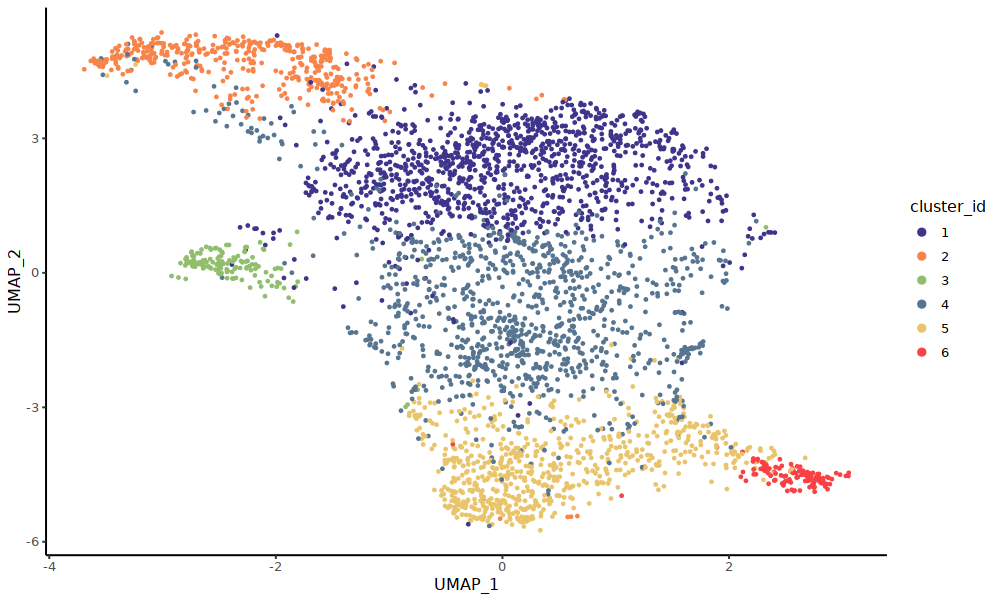

In [308]:
col_pal = sample(col_pal)
p_umap = ggplot(umap_meta, aes(x=UMAP_1, y=UMAP_2, color = cluster_id)) + geom_point(size=0.5, stroke = 0) + theme_classic() + scale_color_manual(values = col_pal) + 
    guides(colour = guide_legend(override.aes = list(size=2)))
p_umap
ggsave(p_umap, filename = "/syn1/wangxin/work/SS2/Li/plots/umap_all_T_cells.pdf", width = 3, height = 2)


In [312]:
print(col_pal)

 [1] "#3d348b" "#f9844a" "#90be6d" "#577590" "#e9c46a" "#f94144" "#606c38"
 [8] "#2a9d8f" "#264653" "#778da9" "#e36414" "#0f4c5c" "#e4c1f9" "#43aa8b"
[15] "#dda15e" "#f3722c" "#fefae0" "#277da1" "#a9def9" "#e0e1dd" "#33a1fd"
[22] "#ffdac6" "#9a031e" "#e9f5db" "#283618" "#1b263b" "#415a77" "#bc6c25"
[29] "#f9c74f" "#d0f4de" "#7678ed" "#f8961e" "#5f0f40" "#c0d6df" "#4d908e"
[36] "#7cb518" "#e76f51"


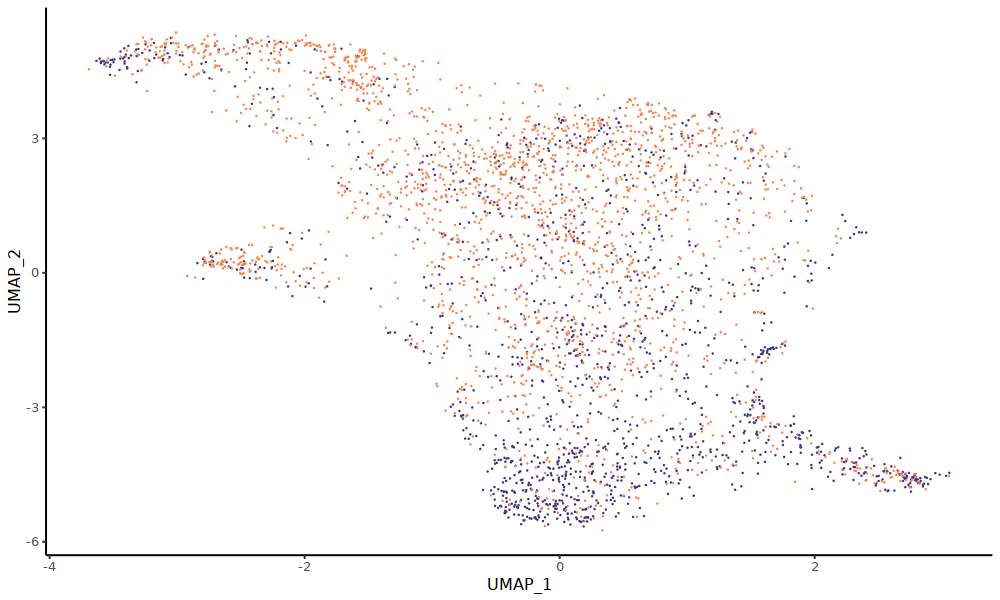

In [316]:
expan_umap = ggplot(umap_meta, aes(x=UMAP_1, y=UMAP_2, color = expanded)) + geom_point(size=0.5, stroke = 0) + theme_classic() + scale_color_manual(values = rev(col_pal[1:2])) + 
    theme(legend.position = "none")
expan_umap
ggsave(expan_umap, filename = "/syn1/wangxin/work/SS2/Li/plots/umap_all_T_cells_expansion.pdf", width = 2, height = 2)

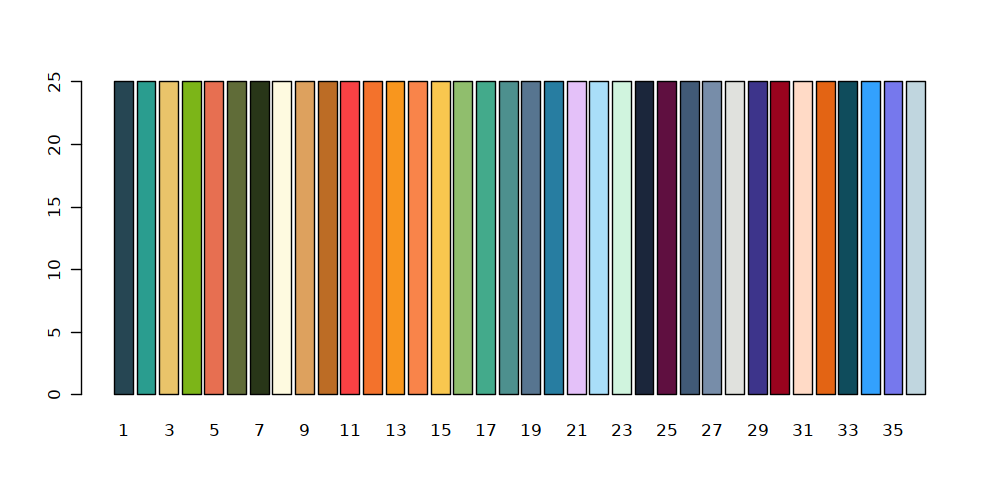

In [49]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 100)
col_pal = c("#264653","#2a9d8f","#e9c46a","#7cb518","#e76f51", 
            "#606c38","#283618","#fefae0","#dda15e","#bc6c25",
            "#f94144","#f3722c","#f8961e","#f9844a","#f9c74f",
            "#90be6d","#43aa8b","#4d908e","#577590","#277da1",
             "#e4c1f9", "#a9def9","#d0f4de", "#1b263b","#5f0f40",
            "#415a77", "#778da9", "#e0e1dd", "#3d348b","#9a031e",
            "#ffdac6", "#e36414", "#0f4c5c", "#33a1fd", "#7678ed",
           "#c0d6df")
barplot(name=1:length(col_pal), height=rep(25, length(col_pal)), col = col_pal)

## MS0816

In [222]:
df_file = paste0(main_dir, simul_id, "/outs_vc1/", simul_id, "_mtSNV_final.csv")
df = read.csv(df_file, row.names = 1, check.names = F)

In [299]:
main_dir = "/syn1/wangxin/work/SS2/Li/samples/"
simul_id = "MS0816"
df_file = paste0(main_dir, simul_id, "/outs_vc1/", simul_id, "_mtSNV_final.csv")
df = read.csv(df_file, row.names = 1, check.names = F)
civ_dir = paste0(main_dir, simul_id, "/CIV")

tcr_meta = read.csv("/syn1/wangxin/work/SS2/Li/new_tcr_meta.csv", check.names = F, row.names = 1)
sub_cells = intersect(colnames(df), rownames(tcr_meta))

af.dm = as.matrix(df[,sub_cells]*100)
af.dm[af.dm<1] = 0
vars.tib <- tibble(var = rownames(af.dm),
                   mean_af = rowMeans(af.dm))

start_time <- Sys.time()
vars.tib = mutate(vars.tib, n0 = apply(af.dm, 1, function(x) sum(x == 0)))
#vars.tib = mutate(vars.tib, n1 = apply(af.dm, 1, function(x) sum(x >= 1)))
vars.tib = mutate(vars.tib, n5 = apply(af.dm, 1, function(x) sum(x >= 5)))
vars.tib = mutate(vars.tib, n10 = apply(af.dm, 1, function(x) sum(x >= 10)))
vars.tib = mutate(vars.tib, n20 = apply(af.dm, 1, function(x) sum(x >= 20)))
vars.tib = mutate(vars.tib, n50 = apply(af.dm, 1, function(x) sum(x >= 50)))
Sys.time() - start_time

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Test different variant selection thresholds #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Specify variant selection thresholds to test. voi = variant of interest
conditions.tib <- tibble(min_clone_size = rep(seq(5, 10, by = 1), 4),
                         min_vaf = rep(c("n5", "n10", "n20", "n50"), each = 6),
                         vois = NA,
                         n_vois = NA,
                         cells = NA,
                         n_cells = NA,
                         transitions = NA)
vois.ls <- vector(mode = "list", length = nrow(conditions.tib))
cells.ls <- vector(mode = "list", length = nrow(conditions.tib))

vars_filter.tib <- vars.tib %>% filter(n0 > 0.9*ncol(af.dm)) # change this from 0.9 to 0.6 to include more variants
# Fill in conditions.tib
for (x in 1:nrow(conditions.tib)) {
    min_clone_size <- conditions.tib$min_clone_size[x]
    min_vaf <- conditions.tib$min_vaf[x]

    # Define variants of which the number of cells exceeding min_vaf is higher than min_clone_size
    voi.ch <- vars_filter.tib$var[vars_filter.tib[[min_vaf]] >= min_clone_size]
    #print(voi.ch)
    if (length(voi.ch) == 0) {
         # Add information to summary table
        conditions.tib[x,"n_vois"] <- 0
        conditions.tib[x,"n_cells"] <- NA
        # Transitions vs. transversions
        conditions.tib[x,"transitions"] <- NA
        
        # Save variants and cells for these parameters
        vois.ls[[x]] <- NA
        #print(positive_cells)
        cells.ls[[x]] <- NA
    }
    else {
        #print(voi.ch)
        # Which cells are positive for at least one of the variants?
        af_subset.dm <- af.dm[voi.ch, ,drop = FALSE]
        positive_cells <- colnames( af_subset.dm[,colSums(af_subset.dm > 1) > 0 , drop = FALSE] ) # changed the original code
        
        # Add information to summary table
        conditions.tib[x,"n_vois"] <- length(voi.ch)
        conditions.tib[x,"n_cells"] <- length(positive_cells)
        # Transitions vs. transversions
        conditions.tib[x,"transitions"] <- mean( str_count(voi.ch, "G>A|A>G|C>T|T>C") )
        
        # Save variants and cells for these parameters
        vois.ls[[x]] <- voi.ch
        #print(positive_cells)
        cells.ls[[x]] <- positive_cells
        }
}
conditions.tib$vois <- vois.ls
conditions.tib$cells <- cells.ls
conditions.tib

Time difference of 0.08466792 secs

min_clone_size,min_vaf,vois,n_vois,cells,n_cells,transitions
<dbl>,<chr>,<list>,<int>,<list>,<int>,<dbl>
5,n5,"1351G>A,....",12,SRR17557....,94,0.8333333
6,n5,"1351G>A,....",9,SRR17557....,81,0.8888889
7,n5,"2698G>A,....",6,SRR17557....,63,0.8333333
8,n5,"2698G>A,....",5,SRR17557....,63,0.8000000
9,n5,"2698G>A,....",4,SRR17557....,54,0.7500000
10,n5,"7882A>T,....",3,SRR17557....,49,0.6666667
5,n10,"4665G>A,....",5,SRR17557....,60,0.8000000
6,n10,"4665G>A,....",4,SRR17557....,51,0.7500000
7,n10,"7882A>T,....",2,SRR17557....,39,0.5000000


In [300]:
conditions_subset.tib <- conditions.tib %>% filter(min_clone_size %in% c(5, 10), min_vaf %in% c("n5", "n10","n20","n50"))
conditions_subset.tib


min_clone_size,min_vaf,vois,n_vois,cells,n_cells,transitions
<dbl>,<chr>,<list>,<int>,<list>,<int>,<dbl>
5,n5,"1351G>A,....",12,SRR17557....,94,0.8333333
10,n5,"7882A>T,....",3,SRR17557....,49,0.6666667
5,n10,"4665G>A,....",5,SRR17557....,60,0.8000000
10,n10,"7882A>T,....",2,SRR17557....,39,0.5000000
5,n20,"7882A>T,....",2,SRR17557....,39,0.5000000
10,n20,16362T>C,1,SRR17557....,18,1.0000000
5,n50,16362T>C,1,SRR17557....,18,1.0000000
10,n50,16362T>C,1,SRR17557....,18,1.0000000


In [301]:
# 6. Select variants present in at least 50 cells with a VAF of >20%

a=1
voi.ch <- conditions_subset.tib$vois[[a]]

# List cell IDs that are positive for each of the vois --------------------------------------------
positive_cells.ls <- list()
for (v in voi.ch) {
    # Determine cells with an appreciable VAF
    current_cells.ch <- colnames(af.dm)[af.dm[v,]>1]
    # Save cell IDs for positive cells
    positive_cells.ls[[v]] <- current_cells.ch
}
# Make a tibble of cells marked by each voi
positive_cells.tib <- as_tibble(bind_rows(lapply(positive_cells.ls, function(x) data.frame(cell = x)), .id = "variant")[,2:1]) %>%
    mutate(variant = factor(variant, levels = voi.ch))


# Prepare matrix of variants of interest in cells that are positive for at least one
af_voi.mat <- af.dm[voi.ch,]

af_subset.mat = af_voi.mat[, apply(af_voi.mat, 2, function(x) sum(x>1))>0]

# Customize column order. This is different from the strategy for K562 subclones.
plot_order.mat <- af_subset.mat
for (x in rev(voi.ch)) { plot_order.mat <- plot_order.mat[,order(-plot_order.mat[x,])] }
#for (x in voi.ch) { plot_order.mat <- plot_order.mat[,order(-plot_order.mat[x,])] }

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



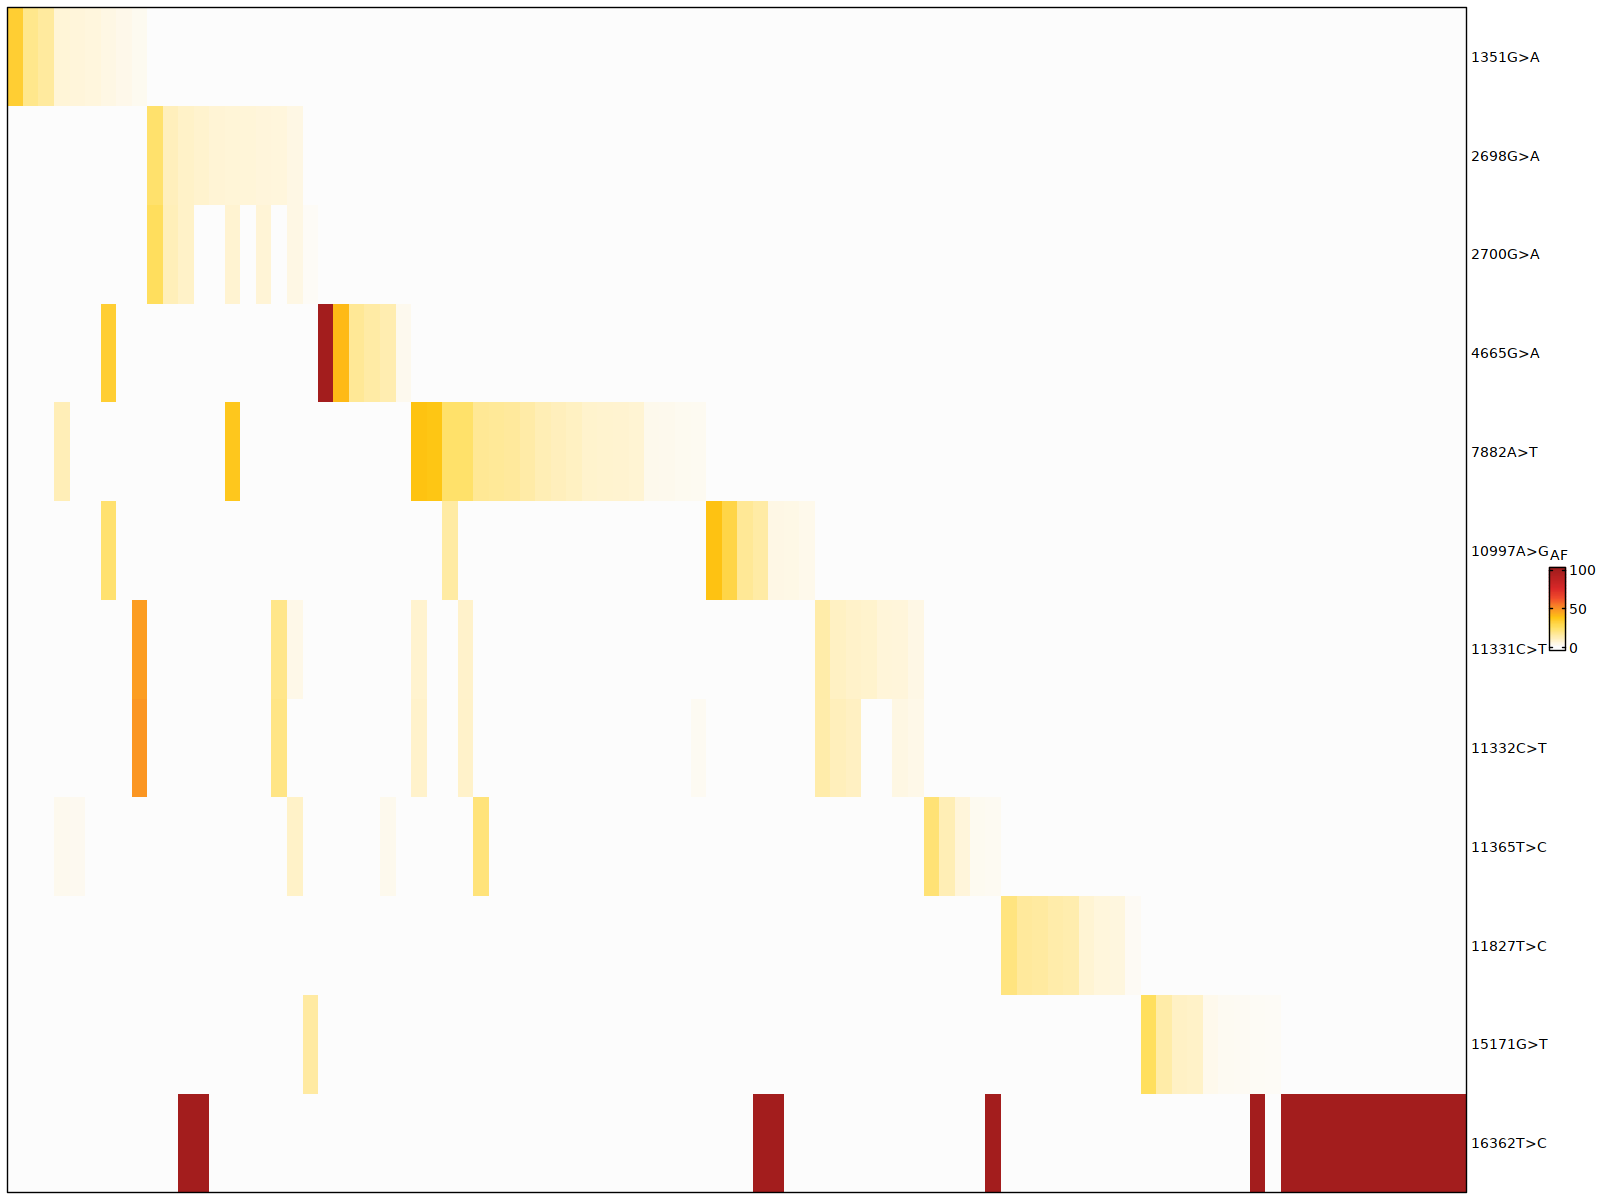

In [302]:
options(repr.plot.width=16, repr.plot.height=12)
Heatmap(plot_order.mat,
              col = colorRamp2(seq(0, round(max(plot_order.mat)), length.out = 9),
                               c("#FCFCFC","#FFEDB0","#FFDF5F","#FEC510","#FA8E24","#F14C2B","#DA2828","#BE2222","#A31D1D")),
              show_row_names = ifelse(nrow(plot_order.mat) < 100, T, F),
              show_column_names = F,
              cluster_columns = F,
              cluster_rows = F,
              row_names_gp = gpar(fontsize = 10),
              name = "AF",
              heatmap_legend_param = list(border = "#000000", grid_height = unit(10, "mm")),
              #top_annotation = ha,
              border = T,
              #width = unit(250, "mm"),
              #height = unit(120, "mm"),
              use_raster = T,
              raster_quality = 5)

In [303]:
cor.mat = cor(t(af_subset.mat))
#cor.mat
var.clust = hclust(as.dist(1 - cor.mat))

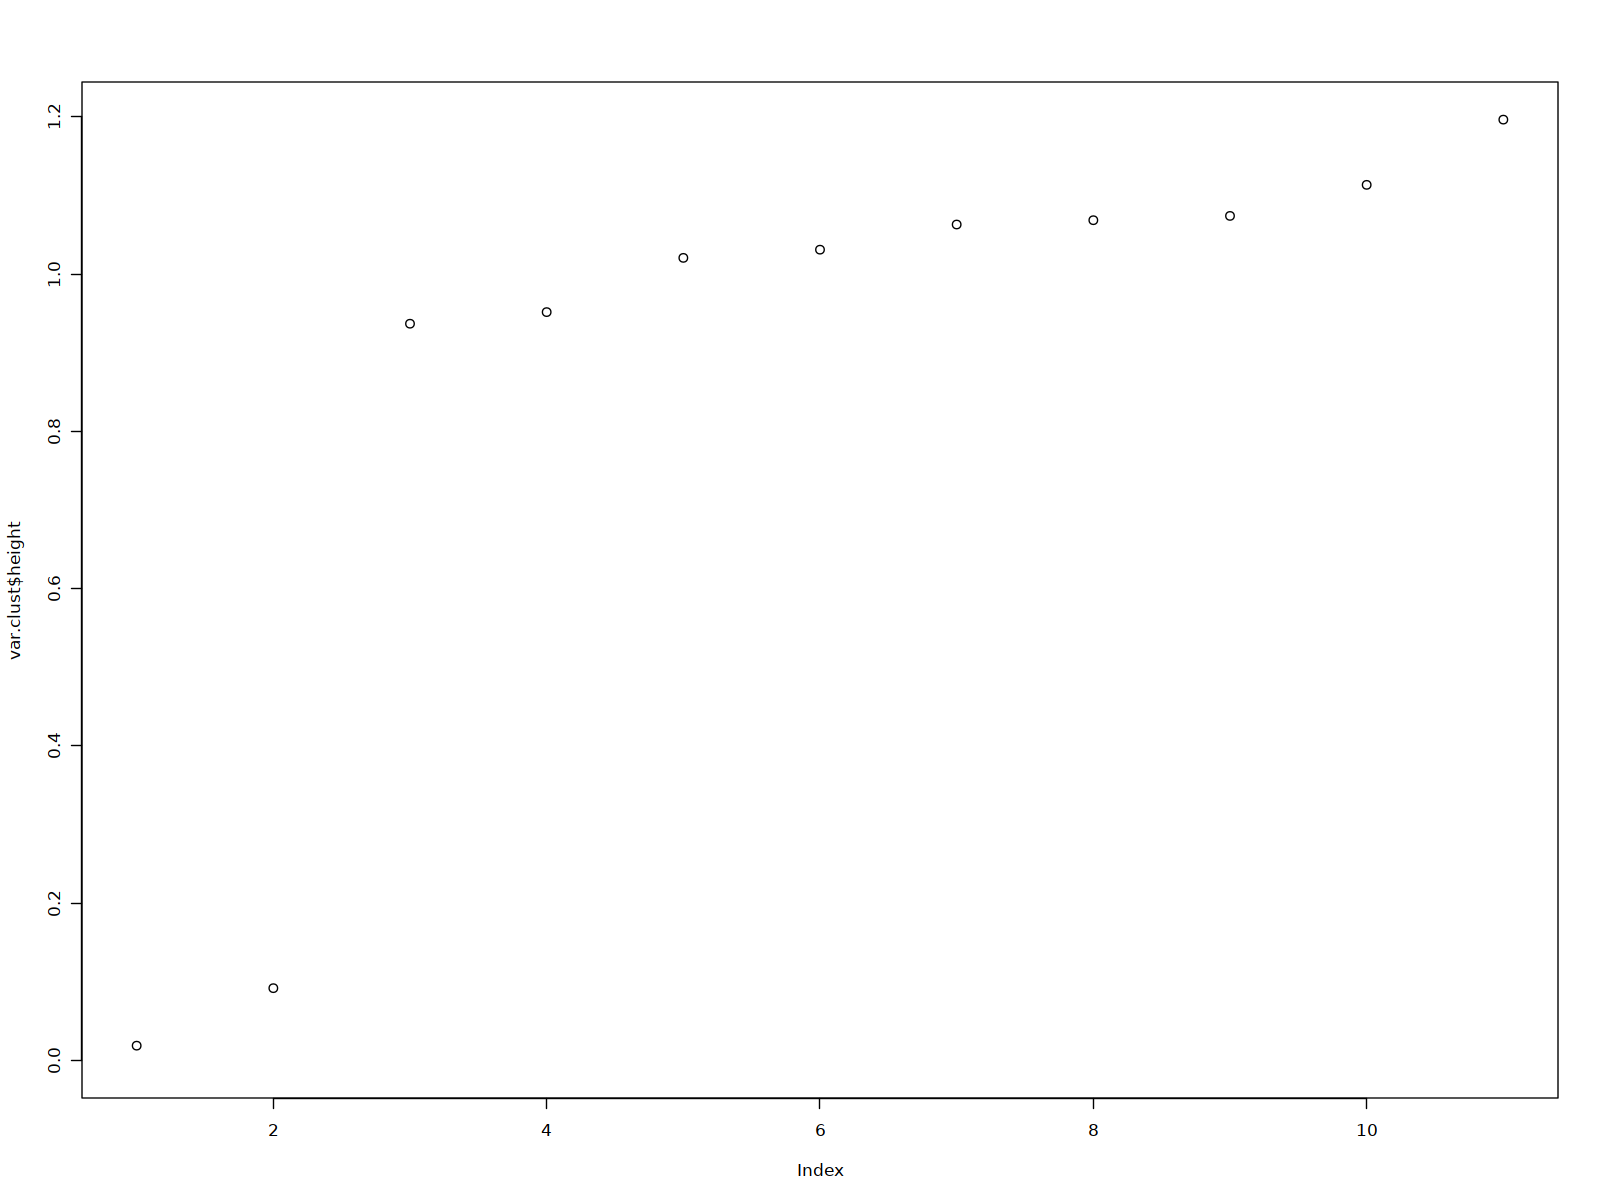

In [304]:
plot(var.clust$height, ylim = c(0, max(var.clust$height)))

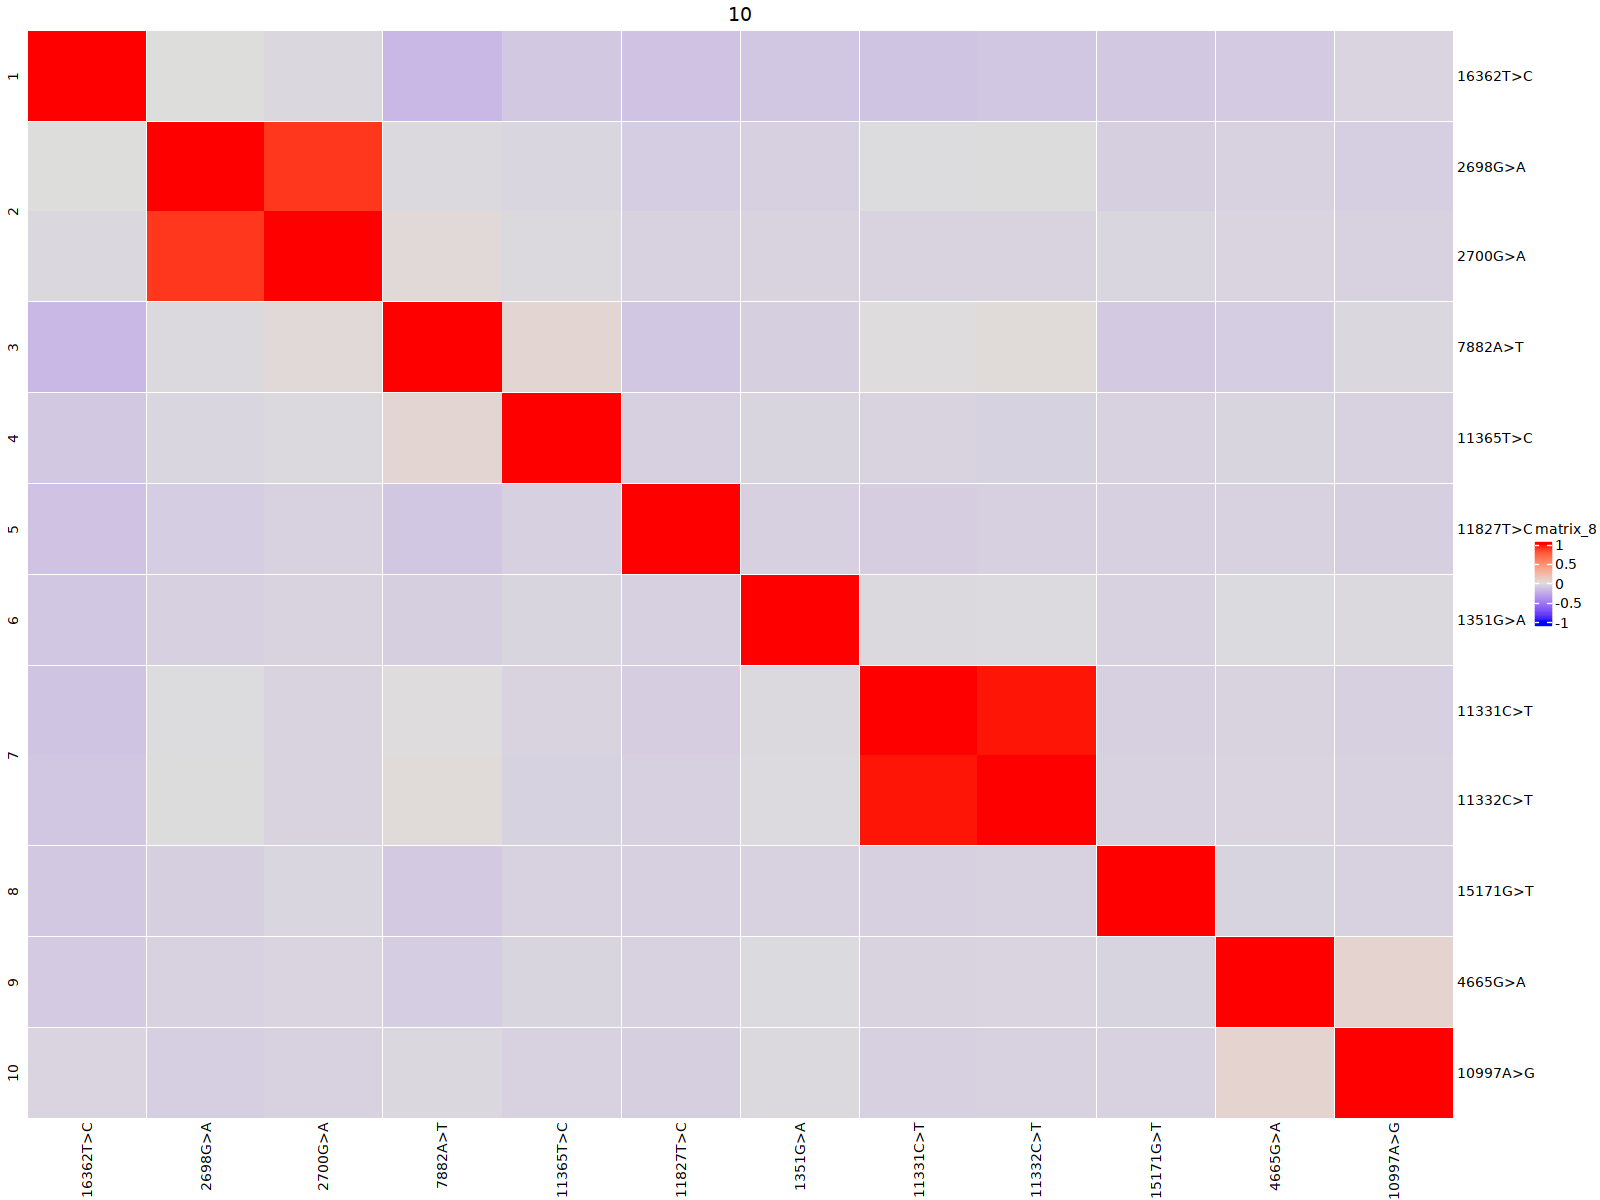

In [305]:
ngroups = length(var.clust$height) - sum(var.clust$height<0.8) + 1
Heatmap(cor.mat,
               col = colorRamp2(c(-1,0,1), c("blue", "#DDDDDD", "red")),
               cluster_columns = var.clust,
               cluster_rows = var.clust,
               row_split = switch(ngroups < length(voi.ch), ngroups),
               column_split = switch(ngroups < length(voi.ch), ngroups),
               show_row_dend = F, # without this the visualizationn does not complete
               show_column_dend = F, # without this the visualizationn does not complete
               row_gap = unit(0.5, "mm"),
               column_gap = unit(0.5, "mm"),
               row_names_gp = gpar(fontsize = 10),
               column_names_gp = gpar(fontsize = 10),
               row_title_gp = gpar(fontsize = 10),
               #width = unit(150, "mm"),
               #height = unit(150, "mm"),
               column_title = ngroups)

[1] TRUE

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



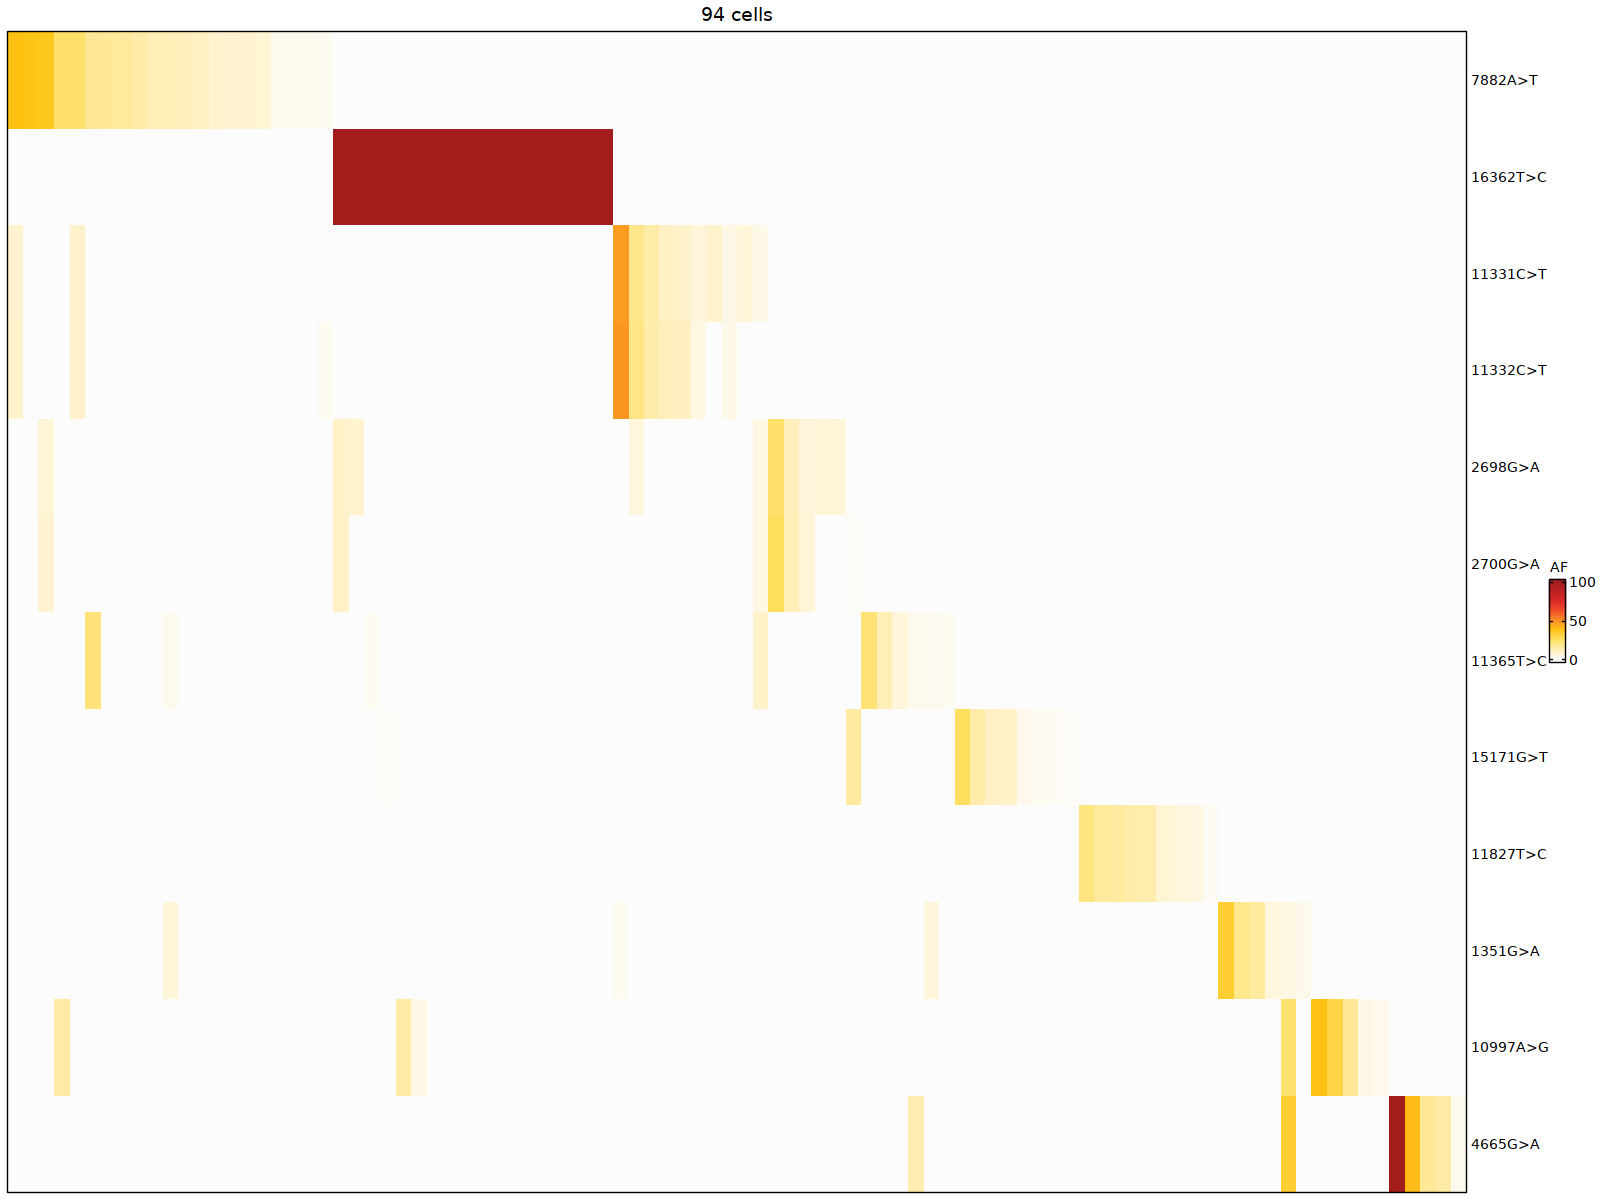

In [306]:
Groups.tib <- tibble(var = names(cutree(var.clust, k = ngroups)), Cut = cutree(var.clust, k = ngroups))[var.clust$order,]
Groups.tib <- Groups.tib %>% mutate(Group = match(Cut, unique(Cut)))
Groups.tib <- Groups.tib %>% mutate(Group = match(Cut, unique(Cut)))
Groups.tib <- Groups.tib %>% group_by(Group) %>% summarize(vars = toString(var), nvar = n())
GroupIDs.ls <- lapply(str_split(Groups.tib$vars, ", "), function(x) c(sapply(x, function(y) colnames(af.dm[,af.dm[y,] > 1]))))
Groups.tib$ncells <- unlist(lapply(GroupIDs.ls, function(x) length(unique(unlist(x)))))           
Groups.tib <- Groups.tib %>% arrange(desc(ncells), desc(nvar))

identical(sort(voi.ch),sort(unlist(str_split(Groups.tib$vars, ", "))))

#~~~~~~~~~~~~~#
# VAF heatmap #
#~~~~~~~~~~~~~#

# Sort for all variants from the correlation matrix
plot_order.mat <- af_subset.mat[unlist(str_split(Groups.tib$vars, ", ")),]
# Customize column order.
for (x in rev(strsplit(Groups.tib$vars, ", "))) {
    if (length(x) == 1) {
        plot_order.mat <- plot_order.mat[,order(-plot_order.mat[x,])]
    } else {
        plot_order.mat <- plot_order.mat[,order(-colSums(plot_order.mat[x,]))]
    }
}

Heatmap(plot_order.mat, column_title = paste0(ncol(plot_order.mat)," cells"), 
               col = colorRamp2(seq(0, round(max(plot_order.mat)), length.out = 9),
                                c("#FCFCFC","#FFEDB0","#FFDF5F","#FEC510","#FA8E24","#F14C2B","#DA2828","#BE2222","#A31D1D")),
               show_row_names = T,
               show_column_names = F,
               cluster_columns = F,
               cluster_rows = F,
               row_names_gp = gpar(fontsize = 10),
               name = "AF",
               heatmap_legend_param = list(border = "#000000", grid_height = unit(5, "mm")),
               #top_annotation = ha,
               border = T,
               #width = unit(100, "mm"),
               #height = unit(100, "mm"),
               use_raster = T,
               raster_quality = 5)

In [307]:

tmp = Groups.tib$vars[Groups.tib$nvar >1]
sample_name = simul_id

if (length(tmp) > 0) {Groups.tib$vars[Groups.tib$nvar >1] = sapply(strsplit(tmp, ","), function (x) {
    names(sort(rowMeans(af.dm[unlist(strsplit(gsub(" ", "",x), ",")),]), decreasing = T)[1])
                                                                   }
                                )
                     }
#make a new matrix containing only CIV
CIV = unlist(Groups.tib$vars)
new_plot_mat = plot_order.mat[CIV,]
#sort the new CIV VAF matrix
for (x in rev(strsplit(Groups.tib$vars, ", "))) {
    if (length(x) == 1) {
        new_plot_mat <- new_plot_mat[,order(-new_plot_mat[x,])]
    } else {
        new_plot_mat <- new_plot_mat[,order(-colSums(new_plot_mat[x,]))]
    }
}


right_end = sapply(CIV, function(x) tail(which(new_plot_mat[x,]>0), 1))
right_bor = 0
CIV_idx = c() 
for (i in 1:length(right_end)) {
    if (right_end[i]>right_bor) {
        right_bor = right_end[i]
        CIV_idx = c(CIV_idx, i)
                        }}
right_end = right_end[CIV_idx]
CIV = CIV[CIV_idx]
left_end = c(1, sapply(right_end[1:length(right_end)-1], function(x) x+1))
cell_num = right_end - left_end + 1
CIV = CIV[cell_num>0] #remove CIVs that are misclustered
new_plot_mat = new_plot_mat[CIV,]
                       
new1 = new_plot_mat[CIV[rev(order(cell_num))],]
my_command = paste0("order(", paste0("-new1[", 1:nrow(new1), ",]", collapse = ","), ")")
new2 = new1[, eval(parse(text = my_command))]
new2 = new2[ , colSums(new2)>0]
CIV = rownames(new2)
right_end = sapply(CIV, function(x) tail(which(new2[x,]>0), 1))
left_end = c(1, sapply(right_end[1:length(right_end)-1], function(x) x+1))
cell_num = right_end - left_end + 1                     
clone_info_df = data.frame(Cell = colnames(new2), Clone = rep(CIV, cell_num))

#remove clones with only one cell.
cell_num_dict = table(clone_info_df$Clone)
passed_CIV = c()
for (civ in CIV) {
    if (cell_num_dict[civ] >=2) {
        passed_CIV = append(passed_CIV, civ)
    }
}

small_clone_num = length(CIV) - length(passed_CIV)
CIV = passed_CIV
keep_cells = clone_info_df[clone_info_df$Clone %in% CIV, "Cell"]
small_clone_cell_num = ncol(new2) - length(keep_cells)
message(paste0("Removed ", small_clone_num, " small clones, and ", small_clone_cell_num, " cells falling within the small clones were removed."))
#remove cells from the small clones 
clone_info_df = clone_info_df[clone_info_df$Clone %in% CIV, ]
new2 = new2[CIV, keep_cells]
      
CIV_file_name = paste0(civ_dir,"/CIV_clones_", simul_id, ".csv")
write.csv(clone_info_df, file = CIV_file_name, quote = F, row.names = F)
message("Clone info has been saved to: ", CIV_file_name)
new_plot_mat = new2


Removed 0 small clones, and 0 cells falling within the small clones were removed.

Clone info has been saved to: /syn1/wangxin/work/SS2/Li/samples/MS0816/CIV/CIV_clones_MS0816.csv



In [308]:
new_plot_mat1 = new_plot_mat/100 

all_mean_ls = c()
all_var_ls = c()
sub_mean_ls = c()
sub_var_ls = c()
all_mv1_ls = c()
sub_mv1_ls = c()

for (x in 1:length(CIV)) {
        #all positive cells
        tmp_vaf_ls = new_plot_mat1[CIV[x],][new_plot_mat1[CIV[x],] >= 0.01]
        all_mean_ls = append(all_mean_ls, mean(tmp_vaf_ls))
        all_var_ls = append(all_var_ls, var(tmp_vaf_ls))
        mv1 = mean(tmp_vaf_ls)/(1+var(tmp_vaf_ls))
        all_mv1_ls = append(all_mv1_ls, mv1)
        #sub cells
        tmp_vaf_ls = new_plot_mat1[CIV[x],clone_info_df$Cell[clone_info_df$Clone == CIV[x]]]
        tmp_vaf_ls = tmp_vaf_ls[tmp_vaf_ls >= 0.01]
        sub_mean_ls = append(sub_mean_ls, mean(tmp_vaf_ls))
        sub_var_ls = append(sub_var_ls, var(tmp_vaf_ls))
        mv1 = mean(tmp_vaf_ls)/(1+var(tmp_vaf_ls))
        sub_mv1_ls = append(sub_mv1_ls, mv1)
}

meanvar_df_all = data.frame("Clone" = CIV, "Mean" = all_mean_ls, "Variance" = all_var_ls, "MV1" = all_mv1_ls, "Sim" = rep(sample_name, length(CIV)), "Method" = rep("All", length(CIV)))
meanvar_df_sub= data.frame("Clone" = CIV, "Mean" = sub_mean_ls, "Variance" = sub_var_ls, "MV1" = sub_mv1_ls, "Sim" = rep(sample_name, length(CIV)),  "Method" = rep("Sub", length(CIV)))


meanvar_df = rbind(meanvar_df_all, meanvar_df_sub)
meanvar_file_name = paste0(civ_dir,"/meanvar_CIV_", sample_name, ".csv")
write.csv(meanvar_df, file = meanvar_file_name, quote = F, row.names = F)
message("Mean, variance and MV1 info have been saved to: ", meanvar_file_name)


Mean, variance and MV1 info have been saved to: /syn1/wangxin/work/SS2/Li/samples/MS0816/CIV/meanvar_CIV_MS0816.csv



In [309]:
shannon_e = c()
meta = tcr_meta
for (i in CIV) {
    cell = clone_info_df[clone_info_df$Clone == i, "Cell"]
    colony_comp = meta[cell, "CDR3b"]
    shannon_e = append(shannon_e, calculate_entropy(colony_comp))
}
diversity_df = data.frame(Diversity=shannon_e, row.names = CIV)
diversity_file_name = paste0(civ_dir,"/diversity_CIV_", sample_name, ".csv")
write.csv(diversity_df, file = diversity_file_name, quote =F)
message("Diversity info has been saved to: ", diversity_file_name)

Diversity info has been saved to: /syn1/wangxin/work/SS2/Li/samples/MS0816/CIV/diversity_CIV_MS0816.csv



Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


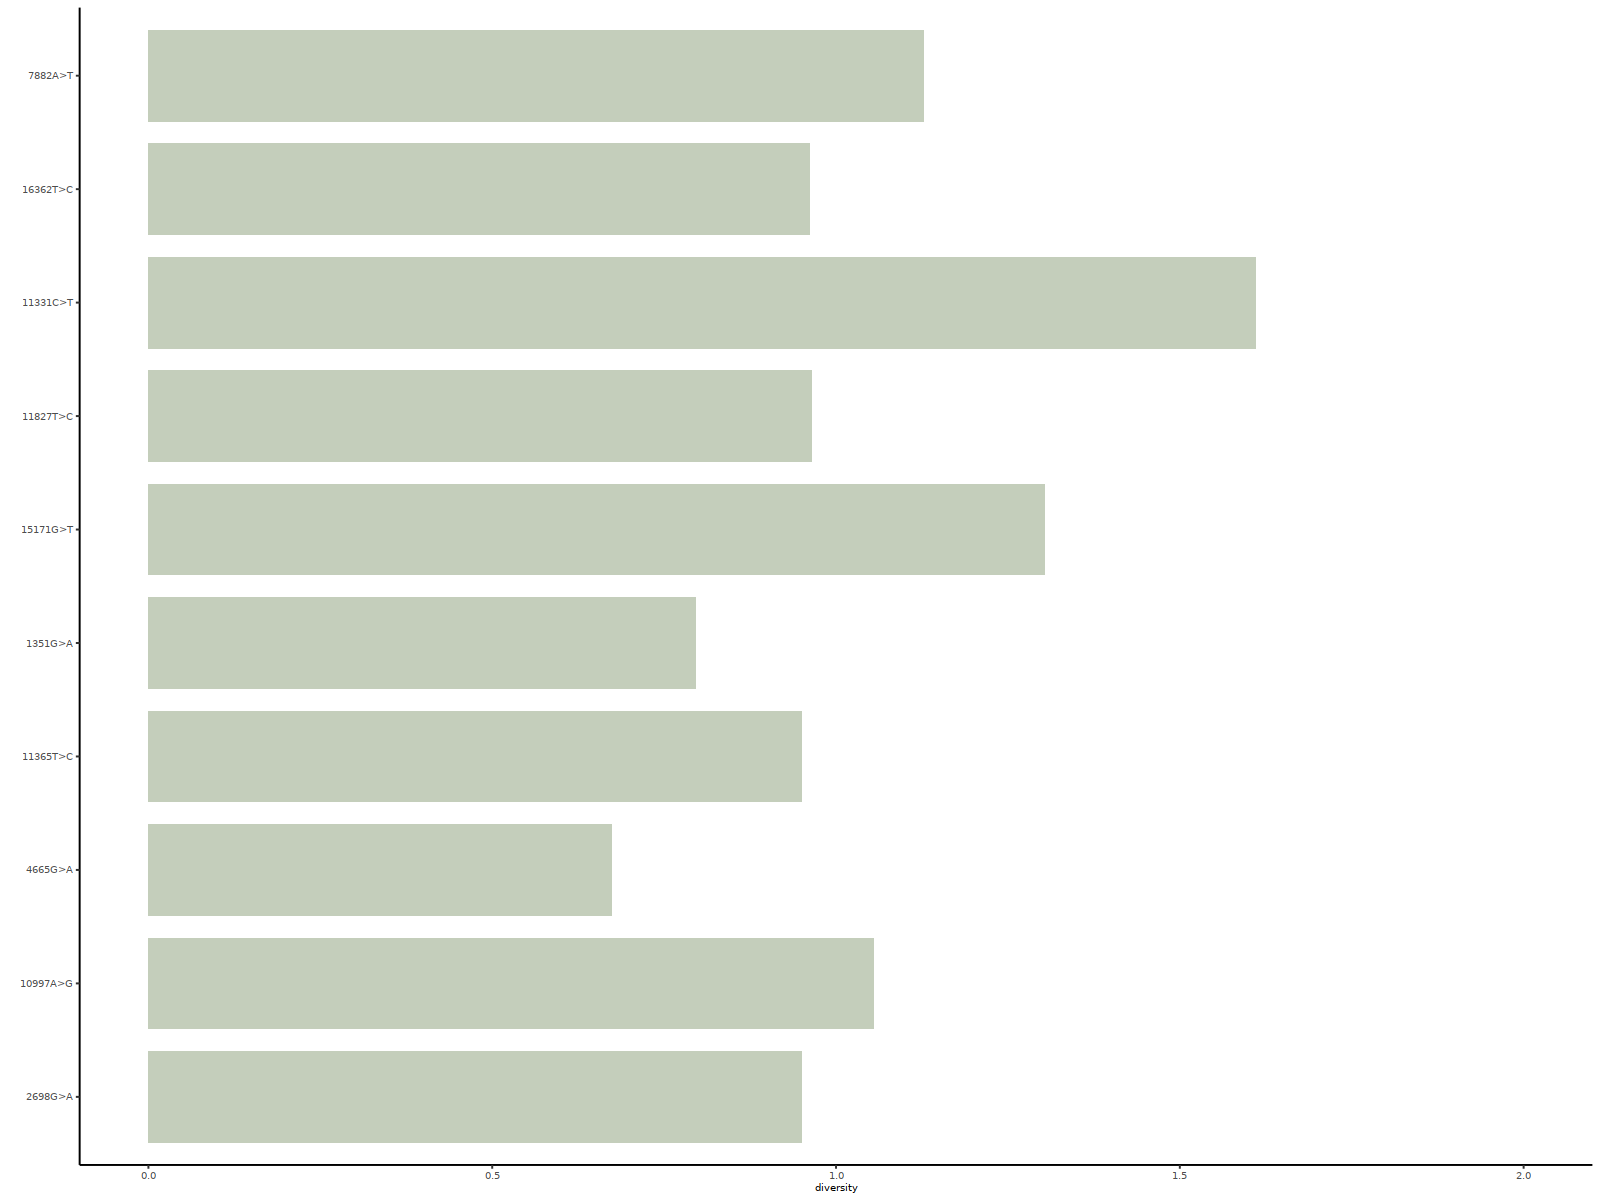

In [310]:
plot_df = data.frame(variant=CIV, diversity = shannon_e)
plot_df$variant = factor(plot_df$variant, levels = rev(CIV) )
diversity_plot = ggplot(plot_df, aes(x=variant, y=diversity)) + geom_bar(stat="identity", fill = "#899d78", alpha=0.5, width = 0.8) + theme_classic() +
        theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 7), axis.title = element_text(size=7)) +
        scale_y_continuous(breaks = seq(0, ceiling(max(shannon_e)), 0.5)) + ylim(0, ceiling(max(shannon_e))) + xlab("") + coord_flip()
diversity_plot
ggsave(plot = diversity_plot, file = paste0(civ_dir, "/diversity_plot.pdf"), height = 3, width = 3)

In [104]:
saveRDS(file = "/syn1/wangxin/work/SS2/Li/plots/col_pal_fig2_SS2_TCR_20240301.rds", col_pal)

In [120]:
col_pal = readRDS("/syn1/wangxin/work/SS2/Li/plots/col_pal_fig2_SS2_TCR_20240301.rds")

[1] "#f8961e" "#c0d6df" "#9a031e" "#0f4c5c" "#e36414" "#dda15e" "#fefae0"
 [8] "#283618" "#7cb518" "#e9c46a" "#90be6d" "#e76f51" "#e4c1f9" "#f9c74f"
[15] "#a9def9" "#3d348b" "#33a1fd" "#2a9d8f" "#43aa8b" "#577590" "#f3722c"
[22] "#264653" "#778da9" "#d0f4de" "#277da1" "#f94144" "#ffdac6" "#7678ed"
[29] "#606c38" "#415a77" "#1b263b" "#bc6c25" "#5f0f40" "#4d908e" "#e0e1dd"
[36] "#f9844a"

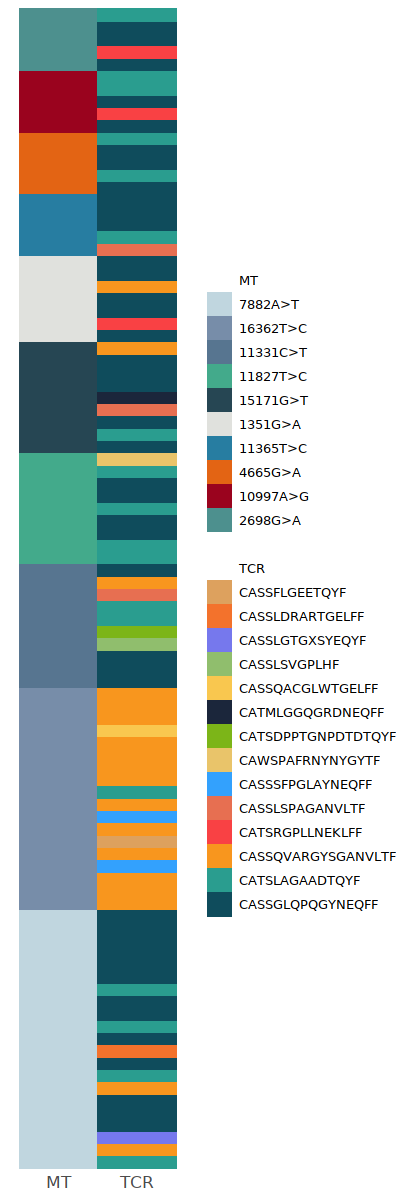

In [261]:
options(repr.plot.width = 4, repr.plot.height = 12, repr.plot.res = 100)
col_pal = sample(col_pal)


TCR_df = data.frame("TCR" = tcr_meta[colnames(new_plot_mat), "CDR3b"], row.names = colnames(plot_order.mat))
TCR_seq = unique(TCR_df$TCR)


bar_plot_df = cbind(clone_info_df, TCR_df)
TCR_freq_df = as.data.frame(table(bar_plot_df$TCR))
TCR_order = as.character(TCR_freq_df[order(TCR_freq_df$Freq),"Var1"])
mt_order = unique(bar_plot_df$Clone)


df_log = pivot_longer(bar_plot_df, cols = c("Clone", "TCR"), names_to = "Variable", values_to = "Value")
df_log$Cell = factor(df_log$Cell, levels = colnames(new_plot_mat))
legend_order = c("MT", mt_order, " ","TCR", TCR_order)
df_log$Value = factor(df_log$Value, levels = legend_order)


# Create a color palette
pal1 <- c("white", col_pal[1:length(mt_order)], "white", "white", col_pal[(length(mt_order)+1):(length(mt_order)+length(TCR_order))])
names(pal1) = legend_order

if (length(mt_order)+length(TCR_order) > length(col_pal)) {
    extra_col_num = length(mt_order) + length(TCR_order) - length(col_pal)
    pal1[legend_order[(length(col_pal)+1+3): (length(col_pal) + extra_col_num+3)]] = sample(col_pal[1:length(mt_order)], extra_col_num)
    }


# Plot the stacked bar plot with "CLL" on the y-axis
p = ggplot(df_log, aes(x = Variable, y = Cell, fill = Value)) +
  geom_tile() +
  scale_fill_manual(name = NULL,values = pal1, drop=FALSE) +   guides(fill=guide_legend(ncol=1)) +
   theme(legend.position="right", 
         legend.key = element_rect(fill=NA),
         legend.title=element_blank()) + theme_classic() +
          theme(axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_text(size = 12, face = "italic"), axis.line = element_blank()) + 
            scale_x_discrete(breaks=c("Clone","TCR"), labels=c("MT", "TCR"))
p
ggsave(paste0(civ_dir, "/", sample_name, "_MT_to_TCR_correlation.pdf"), p, height = 4, width = 4)

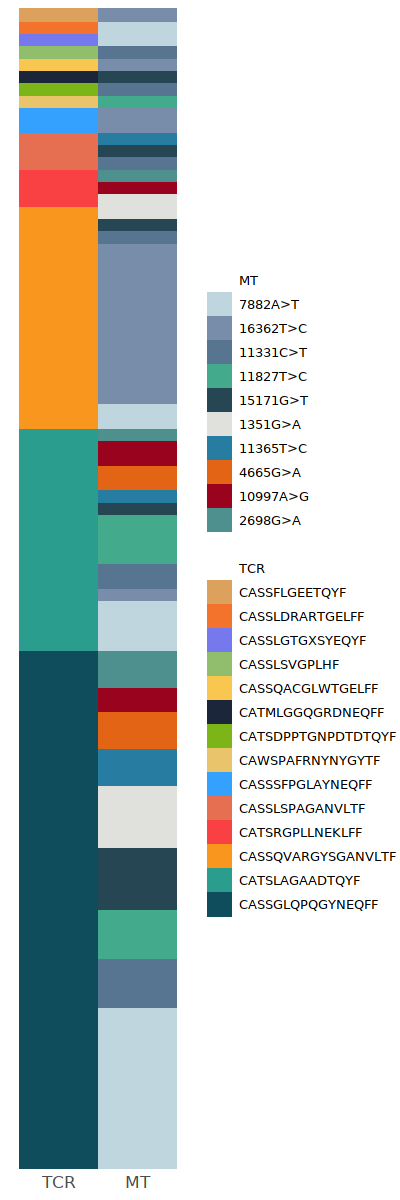

In [262]:
options(repr.plot.width = 4, repr.plot.height = 12, repr.plot.res = 100)
cell_order_by_TCR = bar_plot_df$Cell[order(match(bar_plot_df$TCR, rev(TCR_order)))]
df_log2 = pivot_longer(bar_plot_df, cols = c("Clone", "TCR"), names_to = "Variable", values_to = "Value")
df_log2 = df_log2[order(match(df_log2$Cell, cell_order_by_TCR)),]
df_log2$Cell = factor(df_log2$Cell, levels = cell_order_by_TCR)

legend_order = c("MT", mt_order, " ","TCR", TCR_order)
df_log2$Value = factor(df_log2$Value, levels = legend_order)

df_log2$Variable = factor(df_log2$Variable, levels = c("TCR", "Clone"))

p0 = ggplot(df_log2, aes(x = Variable, y = Cell, fill = Value)) +
  geom_tile() +
  scale_fill_manual(name = NULL,values = pal1, drop=FALSE) + guides(fill=guide_legend(ncol=1)) +
   theme(legend.position="right", 
         legend.key = element_rect(fill=NA),
         legend.title=element_blank()) + theme_classic() +
          theme(axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_text(size = 12, face = "bold"), axis.line = element_blank()) + 
            scale_x_discrete(breaks=c("TCR","Clone"), labels=c("TCR", "MT"))
p0
ggsave(paste0(civ_dir, "/", sample_name, "_TCR_to_MT_correlation.pdf"), p, height = 4, width = 4)

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

CIV heatmaps have been saved to: /syn1/wangxin/work/SS2/Li/samples/MS0816/CIV/MS0816_CIV_SE_heatmap.pdf



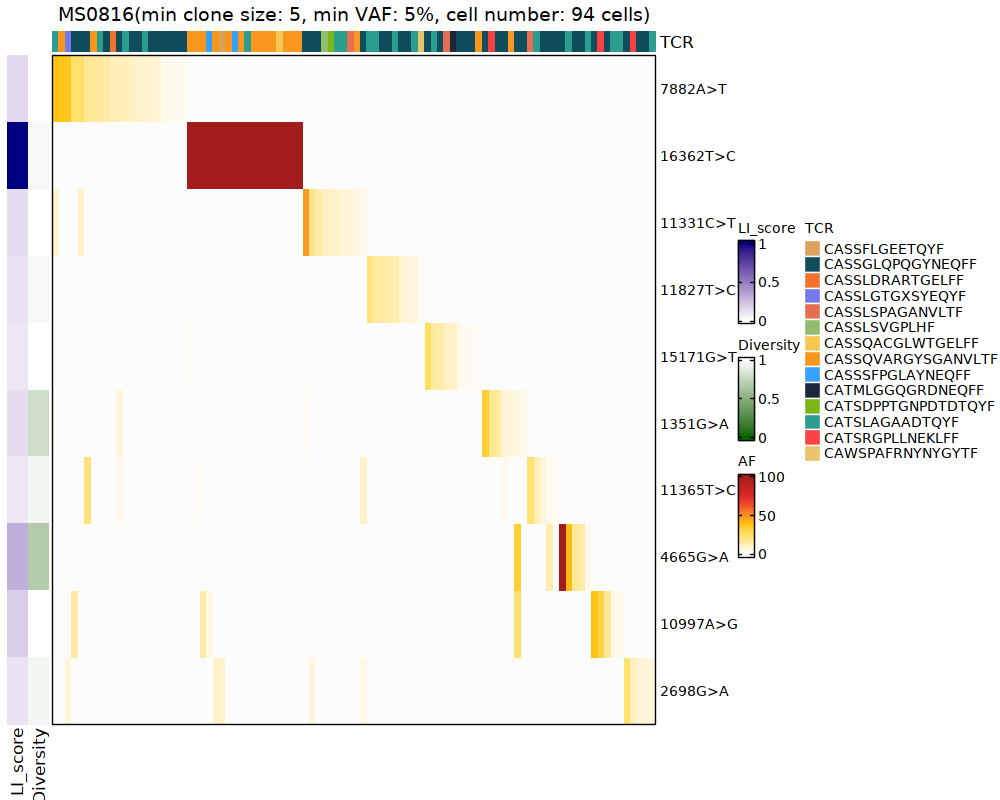

In [311]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 100)
col_pal1 = colorRamp2(c(0, 1), c( "white", "navyblue"))
col_pal2 = colorRamp2(c(0, 1), c( "darkgreen", "white"))
row_annot <- rowAnnotation(
  df = data.frame(LI_score = sub_mv1_ls, Diversity = shannon_e),
  col = list(LI_score = col_pal1, Diversity = col_pal2), annotation_legend_param = list(border = "#000000"))

ct_plot_df = as.data.frame(tibble(TCR=meta[colnames(new_plot_mat),"CDR3b"]))
ann_col = list("TCR"=pal1[TCR_seq])
names(ann_col$TCR) = TCR_seq
ha <- HeatmapAnnotation(df = ct_plot_df, col = ann_col)
clone_size_cutoff = conditions_subset.tib$min_clone_size[a]
vaf_cutoff = substr(conditions_subset.tib$min_vaf[a],2,nchar(conditions_subset.tib$min_vaf[a]))

my_title = paste0(sample_name,"(min clone size: ",clone_size_cutoff,", min VAF: ",vaf_cutoff, "%, cell number: ", ncol(new_plot_mat)," cells)")
htmap_p = Heatmap(new_plot_mat, column_title = my_title, 
               col = colorRamp2(seq(0, 100, length.out = 9),
                                c("#FCFCFC","#FFEDB0","#FFDF5F","#FEC510","#FA8E24","#F14C2B","#DA2828","#BE2222","#A31D1D")),
               show_row_names = T,
               show_column_names = F,
               cluster_columns = F,
               cluster_rows = F,
               row_names_gp = gpar(fontsize = 10),
               name = "AF",
               heatmap_legend_param = list(border = "#000000", grid_height = unit(5, "mm")),
               top_annotation = ha,
                  left_annotation = row_annot,
               border = T,
               #width = unit(100, "mm"),
               #height = unit(100, "mm"),
               use_raster = T,
               raster_quality = 5)
htmap_p

heatmap_name = paste0(civ_dir, "/", sample_name,"_CIV_SE_heatmap.pdf")
pdf(heatmap_name, height = 2.645, width = 6.5)
htmap_p
dev.off()
message(paste0("CIV heatmaps have been saved to: ", heatmap_name))


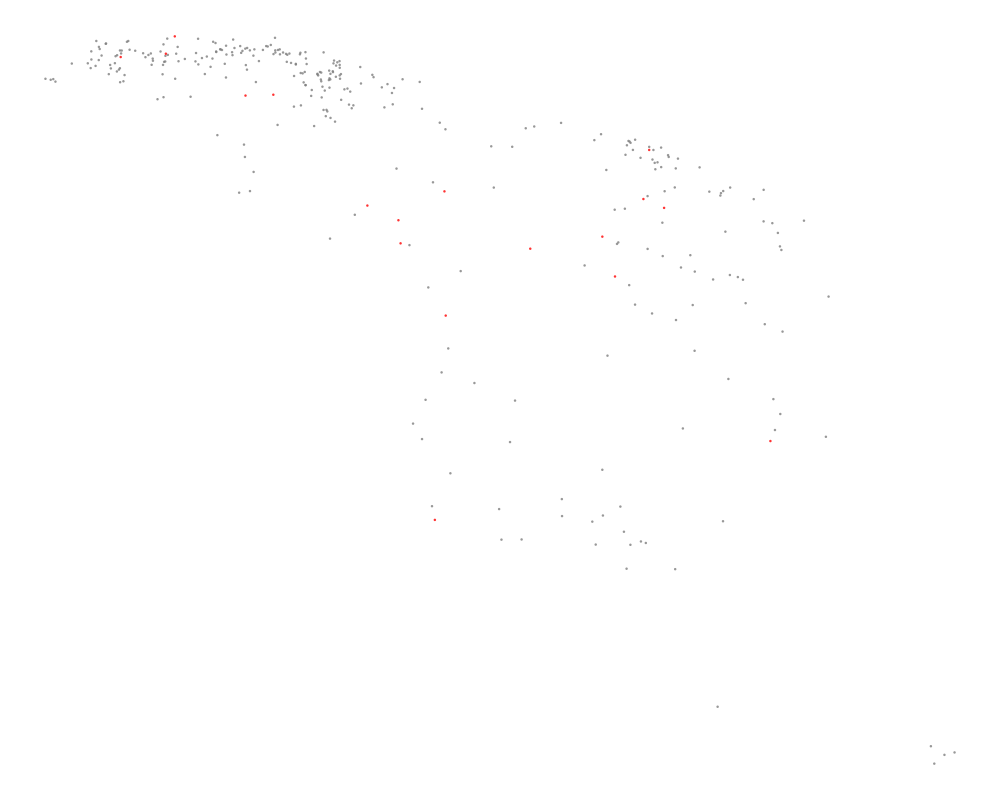

In [295]:
umap_meta = read.csv("/syn1/wangxin/work/SS2/Li/new_tcr_meta.csv", head=T, row.names = 1, check.names = F)
meta_sub = umap_meta[umap_meta$`patient ID` == "MS0816",]
new_meta = meta_sub[,c("UMAP_1", "UMAP_2", "CDR3b")]
new_meta$MT = NA
MT_pos = clone_info_df$Cell[clone_info_df$Clone == "16362T>C"]
new_meta[MT_pos,"MT"] = "16362T>C"
#sort the table for plotting
new_meta = new_meta[rev(order(new_meta$MT)),]
p2 = ggplot(new_meta, aes(x= UMAP_1, y=UMAP_2, color = MT)) + geom_point(size=0.5, alpha= 0.8, stroke = 0 ) + theme_void() + scale_color_manual(values = c("red", "gray"))+ theme(legend.position = "none")
p2
ggsave(paste0(civ_dir, "/MS0816_MT_UMAP.pdf"), p2, height = 2, width = 2)

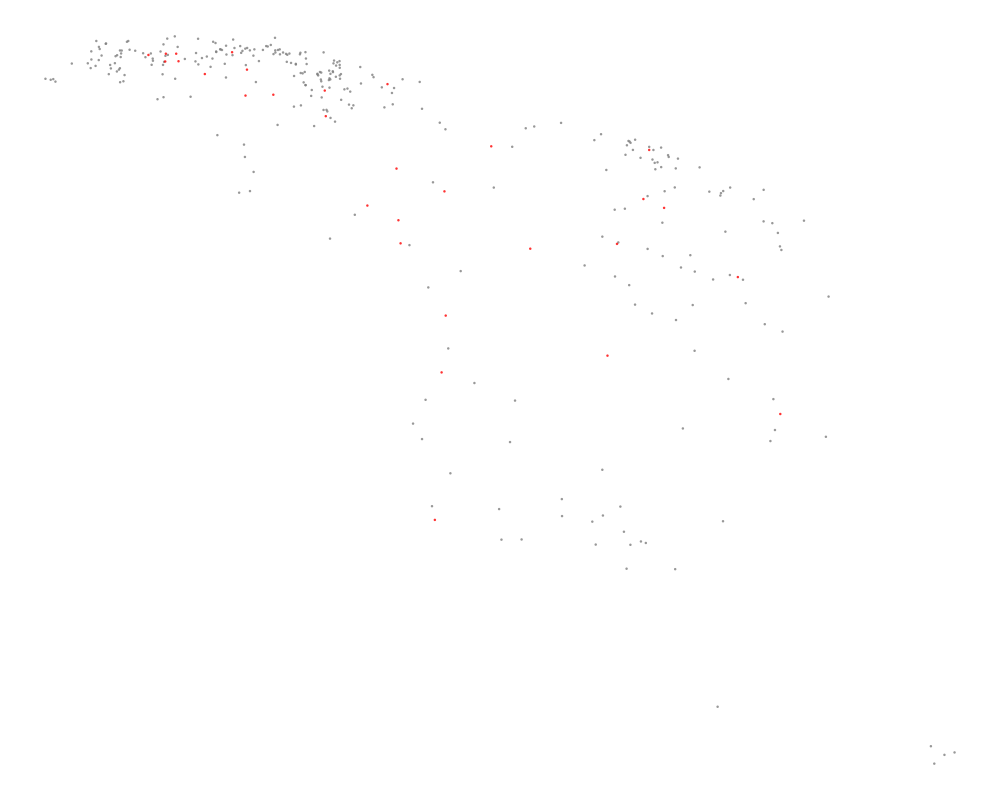

In [296]:
new_meta$TCR = NA
new_meta[new_meta$CDR3b == "CASSQVARGYSGANVLTF", "TCR"] =  "CASSQVARGYSGANVLTF"
#sort the table for plotting
new_meta = new_meta[rev(order(new_meta$TCR)),]
p3 = ggplot(new_meta, aes(x= UMAP_1, y=UMAP_2, color = TCR)) + geom_point(size=0.5, alpha= 0.8,  stroke = 0) + theme_void() + scale_color_manual(values = c("red", "gray")) + theme(legend.position = "none")
p3
ggsave(paste0(civ_dir, "/MS0816_TCR_UMAP.pdf"), p3, height = 2, width = 2)

## SLE232

In [193]:
main_dir = "/syn1/wangxin/work/SS2/Li/samples/"
simul_id = "SLE232"
civ_dir = paste0(main_dir, simul_id, "/CIV")
df_file = paste0(main_dir, simul_id, "/outs_vc1/", simul_id, "_mtSNV_final.csv")
df = read.csv(df_file, row.names = 1, check.names = F)

tcr_meta = read.csv("/syn1/wangxin/work/SS2/Li/new_tcr_meta.csv", check.names = F, row.names = 1)
sub_cells = intersect(colnames(df), rownames(tcr_meta))

af.dm = as.matrix(df[,sub_cells]*100)
af.dm[af.dm<1] = 0
vars.tib <- tibble(var = rownames(af.dm),
                   mean_af = rowMeans(af.dm))

start_time <- Sys.time()
vars.tib = mutate(vars.tib, n0 = apply(af.dm, 1, function(x) sum(x == 0)))
#vars.tib = mutate(vars.tib, n1 = apply(af.dm, 1, function(x) sum(x >= 1)))
vars.tib = mutate(vars.tib, n5 = apply(af.dm, 1, function(x) sum(x >= 5)))
vars.tib = mutate(vars.tib, n10 = apply(af.dm, 1, function(x) sum(x >= 10)))
vars.tib = mutate(vars.tib, n20 = apply(af.dm, 1, function(x) sum(x >= 20)))
vars.tib = mutate(vars.tib, n50 = apply(af.dm, 1, function(x) sum(x >= 50)))
Sys.time() - start_time

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Test different variant selection thresholds #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

# Specify variant selection thresholds to test. voi = variant of interest
conditions.tib <- tibble(min_clone_size = rep(seq(5, 10, by = 1), 4),
                         min_vaf = rep(c("n5", "n10", "n20", "n50"), each = 6),
                         vois = NA,
                         n_vois = NA,
                         cells = NA,
                         n_cells = NA,
                         transitions = NA)
vois.ls <- vector(mode = "list", length = nrow(conditions.tib))
cells.ls <- vector(mode = "list", length = nrow(conditions.tib))

vars_filter.tib <- vars.tib %>% filter(n0 > 0.9*ncol(af.dm)) # change this from 0.9 to 0.6 to include more variants
# Fill in conditions.tib
for (x in 1:nrow(conditions.tib)) {
    min_clone_size <- conditions.tib$min_clone_size[x]
    min_vaf <- conditions.tib$min_vaf[x]

    # Define variants of which the number of cells exceeding min_vaf is higher than min_clone_size
    voi.ch <- vars_filter.tib$var[vars_filter.tib[[min_vaf]] >= min_clone_size]
    #print(voi.ch)
    if (length(voi.ch) == 0) {
         # Add information to summary table
        conditions.tib[x,"n_vois"] <- 0
        conditions.tib[x,"n_cells"] <- NA
        # Transitions vs. transversions
        conditions.tib[x,"transitions"] <- NA
        
        # Save variants and cells for these parameters
        vois.ls[[x]] <- NA
        #print(positive_cells)
        cells.ls[[x]] <- NA
    }
    else {
        #print(voi.ch)
        # Which cells are positive for at least one of the variants?
        af_subset.dm <- af.dm[voi.ch, ,drop = FALSE]
        positive_cells <- colnames( af_subset.dm[,colSums(af_subset.dm > 1) > 0 , drop = FALSE] ) # changed the original code
        
        # Add information to summary table
        conditions.tib[x,"n_vois"] <- length(voi.ch)
        conditions.tib[x,"n_cells"] <- length(positive_cells)
        # Transitions vs. transversions
        conditions.tib[x,"transitions"] <- mean( str_count(voi.ch, "G>A|A>G|C>T|T>C") )
        
        # Save variants and cells for these parameters
        vois.ls[[x]] <- voi.ch
        #print(positive_cells)
        cells.ls[[x]] <- positive_cells
        }
}
conditions.tib$vois <- vois.ls
conditions.tib$cells <- cells.ls
conditions.tib

Time difference of 0.07684875 secs

min_clone_size,min_vaf,vois,n_vois,cells,n_cells,transitions
<dbl>,<chr>,<list>,<int>,<list>,<int>,<dbl>
5,n5,"664G>T, ....",9,SRR17557....,95,0.4444444
6,n5,"664G>T, ....",7,SRR17557....,79,0.5714286
7,n5,"664G>T, ....",7,SRR17557....,79,0.5714286
8,n5,"1201A>G,....",6,SRR17557....,73,0.6666667
9,n5,"2617A>G,....",4,SRR17557....,60,0.5000000
10,n5,"2617A>G,....",3,SRR17557....,42,0.6666667
5,n10,"1201A>G,....",6,SRR17557....,73,0.6666667
6,n10,"1201A>G,....",6,SRR17557....,73,0.6666667
7,n10,"1201A>G,....",5,SRR17557....,58,0.8000000


In [194]:
conditions_subset.tib <- conditions.tib %>% filter(min_clone_size %in% c(5, 10), min_vaf %in% c("n5", "n10","n20","n50"))
conditions_subset.tib


min_clone_size,min_vaf,vois,n_vois,cells,n_cells,transitions
<dbl>,<chr>,<list>,<int>,<list>,<int>,<dbl>
5,n5,"664G>T, ....",9,SRR17557....,95,0.4444444
10,n5,"2617A>G,....",3,SRR17557....,42,0.6666667
5,n10,"1201A>G,....",6,SRR17557....,73,0.6666667
10,n10,"2617A>G,....",2,SRR17557....,31,1.0000000
5,n20,"1201A>G,....",4,SRR17557....,48,1.0000000
10,n20,"2617A>G,....",2,SRR17557....,31,1.0000000
5,n50,"1201A>G,....",4,SRR17557....,48,1.0000000
10,n50,3849G>A,1,SRR17558....,14,1.0000000


In [195]:
# 6. Select variants present in at least 50 cells with a VAF of >20%

a=1
voi.ch <- conditions_subset.tib$vois[[a]]

# List cell IDs that are positive for each of the vois --------------------------------------------
positive_cells.ls <- list()
for (v in voi.ch) {
    # Determine cells with an appreciable VAF
    current_cells.ch <- colnames(af.dm)[af.dm[v,]>1]
    # Save cell IDs for positive cells
    positive_cells.ls[[v]] <- current_cells.ch
}
# Make a tibble of cells marked by each voi
positive_cells.tib <- as_tibble(bind_rows(lapply(positive_cells.ls, function(x) data.frame(cell = x)), .id = "variant")[,2:1]) %>%
    mutate(variant = factor(variant, levels = voi.ch))


# Prepare matrix of variants of interest in cells that are positive for at least one
af_voi.mat <- af.dm[voi.ch,]

af_subset.mat = af_voi.mat[, apply(af_voi.mat, 2, function(x) sum(x>1))>0]

# Customize column order. This is different from the strategy for K562 subclones.
plot_order.mat <- af_subset.mat
for (x in rev(voi.ch)) { plot_order.mat <- plot_order.mat[,order(-plot_order.mat[x,])] }
#for (x in voi.ch) { plot_order.mat <- plot_order.mat[,order(-plot_order.mat[x,])] }

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



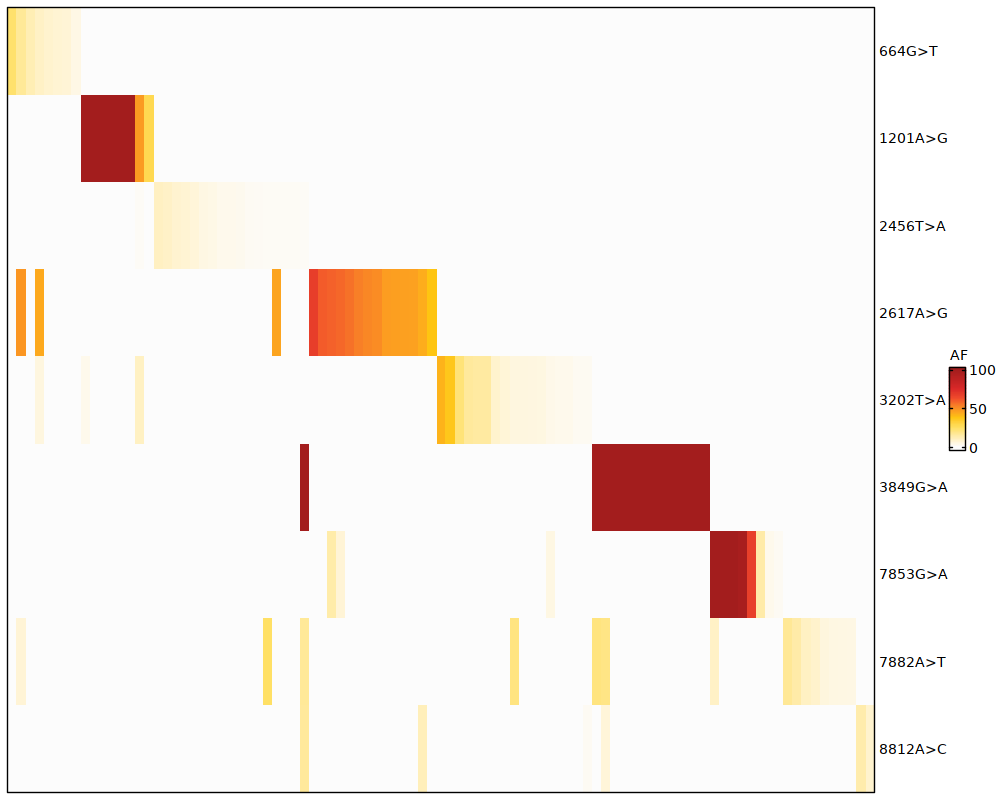

In [196]:
#options(repr.plot.width=16, repr.plot.height=12)
Heatmap(plot_order.mat,
              col = colorRamp2(seq(0, round(max(plot_order.mat)), length.out = 9),
                               c("#FCFCFC","#FFEDB0","#FFDF5F","#FEC510","#FA8E24","#F14C2B","#DA2828","#BE2222","#A31D1D")),
              show_row_names = ifelse(nrow(plot_order.mat) < 100, T, F),
              show_column_names = F,
              cluster_columns = F,
              cluster_rows = F,
              row_names_gp = gpar(fontsize = 10),
              name = "AF",
              heatmap_legend_param = list(border = "#000000", grid_height = unit(10, "mm")),
              #top_annotation = ha,
              border = T,
              #width = unit(250, "mm"),
              #height = unit(120, "mm"),
              use_raster = T,
              raster_quality = 5)

In [197]:
cor.mat = cor(t(af_subset.mat))
#cor.mat
var.clust = hclust(as.dist(1 - cor.mat))

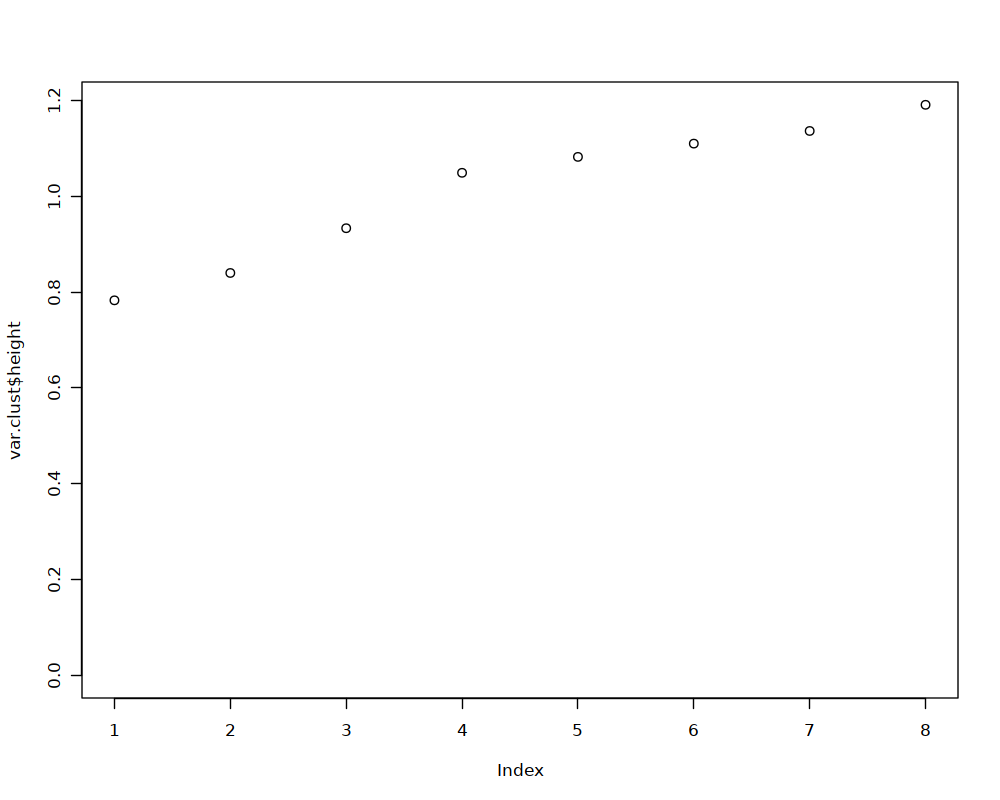

In [198]:
plot(var.clust$height, ylim = c(0, max(var.clust$height)))

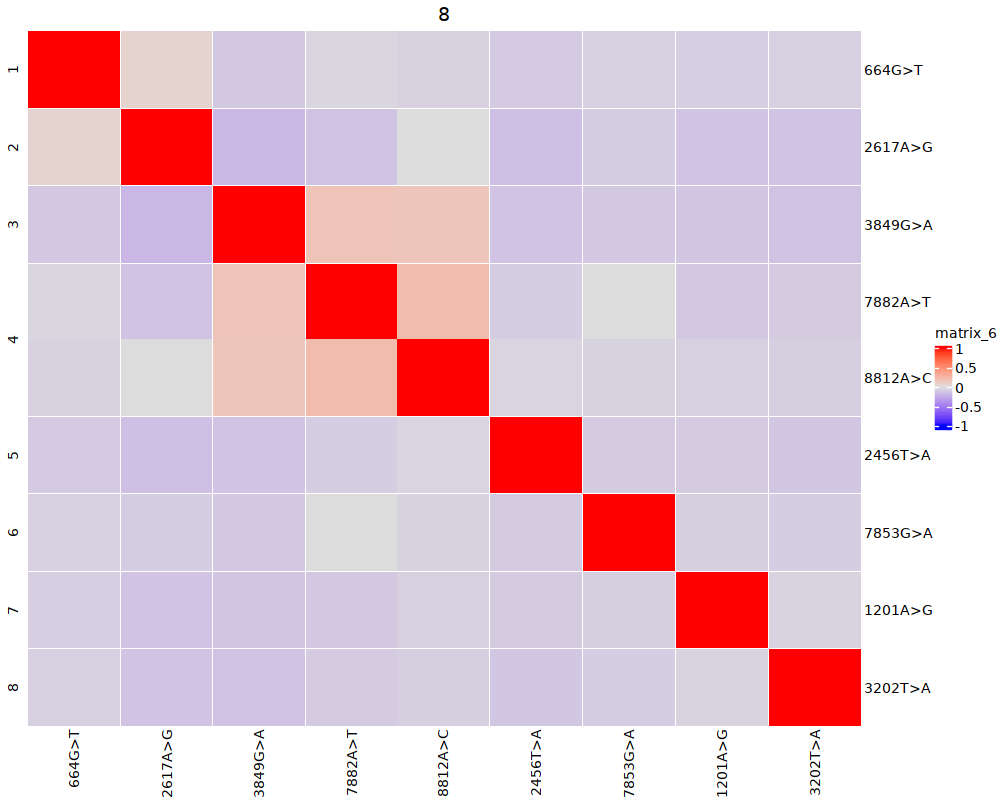

In [199]:
ngroups = length(var.clust$height) - sum(var.clust$height<0.8) + 1
Heatmap(cor.mat,
               col = colorRamp2(c(-1,0,1), c("blue", "#DDDDDD", "red")),
               cluster_columns = var.clust,
               cluster_rows = var.clust,
               row_split = switch(ngroups < length(voi.ch), ngroups),
               column_split = switch(ngroups < length(voi.ch), ngroups),
               show_row_dend = F, # without this the visualizationn does not complete
               show_column_dend = F, # without this the visualizationn does not complete
               row_gap = unit(0.5, "mm"),
               column_gap = unit(0.5, "mm"),
               row_names_gp = gpar(fontsize = 10),
               column_names_gp = gpar(fontsize = 10),
               row_title_gp = gpar(fontsize = 10),
               #width = unit(150, "mm"),
               #height = unit(150, "mm"),
               column_title = ngroups)

[1] TRUE

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



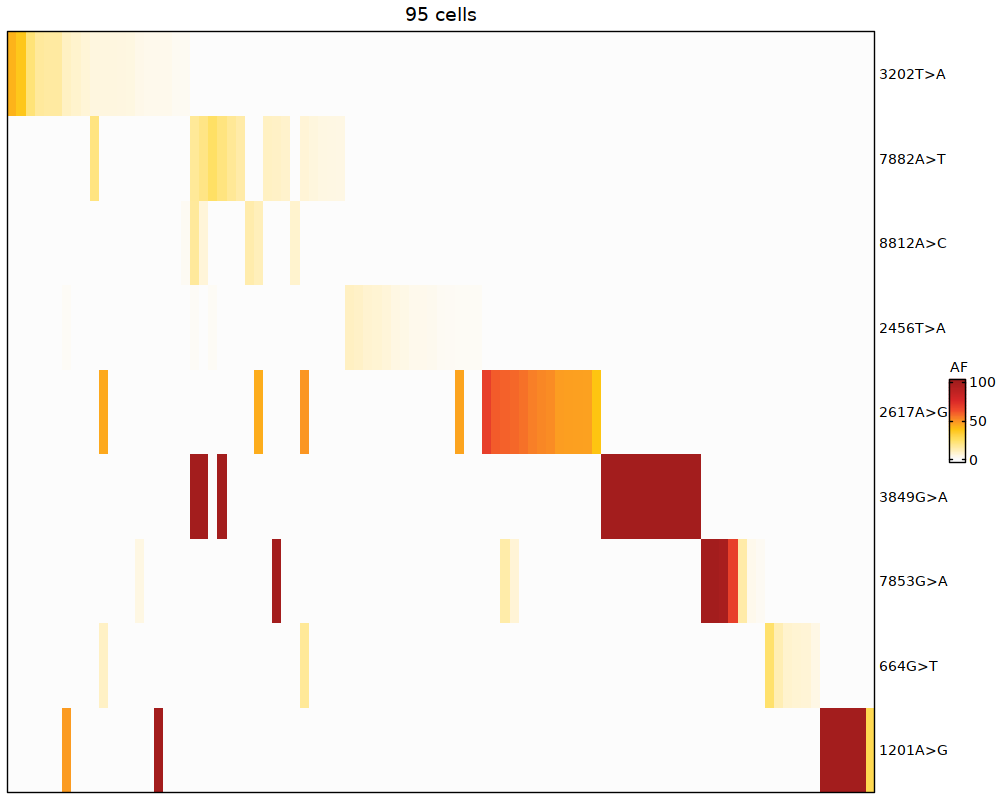

In [200]:
Groups.tib <- tibble(var = names(cutree(var.clust, k = ngroups)), Cut = cutree(var.clust, k = ngroups))[var.clust$order,]
Groups.tib <- Groups.tib %>% mutate(Group = match(Cut, unique(Cut)))
Groups.tib <- Groups.tib %>% mutate(Group = match(Cut, unique(Cut)))
Groups.tib <- Groups.tib %>% group_by(Group) %>% summarize(vars = toString(var), nvar = n())
GroupIDs.ls <- lapply(str_split(Groups.tib$vars, ", "), function(x) c(sapply(x, function(y) colnames(af.dm[,af.dm[y,] > 1]))))
Groups.tib$ncells <- unlist(lapply(GroupIDs.ls, function(x) length(unique(unlist(x)))))           
Groups.tib <- Groups.tib %>% arrange(desc(ncells), desc(nvar))

identical(sort(voi.ch),sort(unlist(str_split(Groups.tib$vars, ", "))))

#~~~~~~~~~~~~~#
# VAF heatmap #
#~~~~~~~~~~~~~#

# Sort for all variants from the correlation matrix
plot_order.mat <- af_subset.mat[unlist(str_split(Groups.tib$vars, ", ")),]
# Customize column order.
for (x in rev(strsplit(Groups.tib$vars, ", "))) {
    if (length(x) == 1) {
        plot_order.mat <- plot_order.mat[,order(-plot_order.mat[x,])]
    } else {
        plot_order.mat <- plot_order.mat[,order(-colSums(plot_order.mat[x,]))]
    }
}

Heatmap(plot_order.mat, column_title = paste0(ncol(plot_order.mat)," cells"), 
               col = colorRamp2(seq(0, round(max(plot_order.mat)), length.out = 9),
                                c("#FCFCFC","#FFEDB0","#FFDF5F","#FEC510","#FA8E24","#F14C2B","#DA2828","#BE2222","#A31D1D")),
               show_row_names = T,
               show_column_names = F,
               cluster_columns = F,
               cluster_rows = F,
               row_names_gp = gpar(fontsize = 10),
               name = "AF",
               heatmap_legend_param = list(border = "#000000", grid_height = unit(5, "mm")),
               #top_annotation = ha,
               border = T,
               #width = unit(100, "mm"),
               #height = unit(100, "mm"),
               use_raster = T,
               raster_quality = 5)

In [201]:

tmp = Groups.tib$vars[Groups.tib$nvar >1]
sample_name = simul_id

if (length(tmp) > 0) {Groups.tib$vars[Groups.tib$nvar >1] = sapply(strsplit(tmp, ","), function (x) {
    names(sort(rowMeans(af.dm[unlist(strsplit(gsub(" ", "",x), ",")),]), decreasing = T)[1])
                                                                   }
                                )
                     }
#make a new matrix containing only CIV
CIV = unlist(Groups.tib$vars)
new_plot_mat = plot_order.mat[CIV,]
#sort the new CIV VAF matrix
for (x in rev(strsplit(Groups.tib$vars, ", "))) {
    if (length(x) == 1) {
        new_plot_mat <- new_plot_mat[,order(-new_plot_mat[x,])]
    } else {
        new_plot_mat <- new_plot_mat[,order(-colSums(new_plot_mat[x,]))]
    }
}


right_end = sapply(CIV, function(x) tail(which(new_plot_mat[x,]>0), 1))
right_bor = 0
CIV_idx = c() 
for (i in 1:length(right_end)) {
    if (right_end[i]>right_bor) {
        right_bor = right_end[i]
        CIV_idx = c(CIV_idx, i)
                        }}
right_end = right_end[CIV_idx]
CIV = CIV[CIV_idx]
left_end = c(1, sapply(right_end[1:length(right_end)-1], function(x) x+1))
cell_num = right_end - left_end + 1
CIV = CIV[cell_num>0] #remove CIVs that are misclustered
new_plot_mat = new_plot_mat[CIV,]
                       
new1 = new_plot_mat[CIV[rev(order(cell_num))],]
my_command = paste0("order(", paste0("-new1[", 1:nrow(new1), ",]", collapse = ","), ")")
new2 = new1[, eval(parse(text = my_command))]
new2 = new2[ , colSums(new2)>0]
CIV = rownames(new2)
right_end = sapply(CIV, function(x) tail(which(new2[x,]>0), 1))
left_end = c(1, sapply(right_end[1:length(right_end)-1], function(x) x+1))
cell_num = right_end - left_end + 1                     
clone_info_df = data.frame(Cell = colnames(new2), Clone = rep(CIV, cell_num))

#remove clones with only one cell.
cell_num_dict = table(clone_info_df$Clone)
passed_CIV = c()
for (civ in CIV) {
    if (cell_num_dict[civ] >=2) {
        passed_CIV = append(passed_CIV, civ)
    }
}

small_clone_num = length(CIV) - length(passed_CIV)
CIV = passed_CIV
keep_cells = clone_info_df[clone_info_df$Clone %in% CIV, "Cell"]
small_clone_cell_num = ncol(new2) - length(keep_cells)
message(paste0("Removed ", small_clone_num, " small clones, and ", small_clone_cell_num, " cells falling within the small clones were removed."))
#remove cells from the small clones 
clone_info_df = clone_info_df[clone_info_df$Clone %in% CIV, ]
new2 = new2[CIV, keep_cells]
      
CIV_file_name = paste0(civ_dir,"/CIV_clones_", simul_id, ".csv")
write.csv(clone_info_df, file = CIV_file_name, quote = F, row.names = F)
message("Clone info has been saved to: ", CIV_file_name)
new_plot_mat = new2


Removed 0 small clones, and 0 cells falling within the small clones were removed.

Clone info has been saved to: /syn1/wangxin/work/SS2/Li/samples/SLE232/CIV/CIV_clones_SLE232.csv



In [202]:
new_plot_mat1 = new_plot_mat/100 

all_mean_ls = c()
all_var_ls = c()
sub_mean_ls = c()
sub_var_ls = c()
all_mv1_ls = c()
sub_mv1_ls = c()

for (x in 1:length(CIV)) {
        #all positive cells
        tmp_vaf_ls = new_plot_mat1[CIV[x],][new_plot_mat1[CIV[x],] >= 0.01]
        all_mean_ls = append(all_mean_ls, mean(tmp_vaf_ls))
        all_var_ls = append(all_var_ls, var(tmp_vaf_ls))
        mv1 = mean(tmp_vaf_ls)/(1+var(tmp_vaf_ls))
        all_mv1_ls = append(all_mv1_ls, mv1)
        #sub cells
        tmp_vaf_ls = new_plot_mat1[CIV[x],clone_info_df$Cell[clone_info_df$Clone == CIV[x]]]
        tmp_vaf_ls = tmp_vaf_ls[tmp_vaf_ls >= 0.01]
        sub_mean_ls = append(sub_mean_ls, mean(tmp_vaf_ls))
        sub_var_ls = append(sub_var_ls, var(tmp_vaf_ls))
        mv1 = mean(tmp_vaf_ls)/(1+var(tmp_vaf_ls))
        sub_mv1_ls = append(sub_mv1_ls, mv1)
}

meanvar_df_all = data.frame("Clone" = CIV, "Mean" = all_mean_ls, "Variance" = all_var_ls, "MV1" = all_mv1_ls, "Sim" = rep(sample_name, length(CIV)), "Method" = rep("All", length(CIV)))
meanvar_df_sub= data.frame("Clone" = CIV, "Mean" = sub_mean_ls, "Variance" = sub_var_ls, "MV1" = sub_mv1_ls, "Sim" = rep(sample_name, length(CIV)),  "Method" = rep("Sub", length(CIV)))


meanvar_df = rbind(meanvar_df_all, meanvar_df_sub)
meanvar_file_name = paste0(civ_dir,"/meanvar_CIV_", sample_name, ".csv")
write.csv(meanvar_df, file = meanvar_file_name, quote = F, row.names = F)
message("Mean, variance and MV1 info have been saved to: ", meanvar_file_name)


Mean, variance and MV1 info have been saved to: /syn1/wangxin/work/SS2/Li/samples/SLE232/CIV/meanvar_CIV_SLE232.csv



In [203]:
shannon_e = c()
meta = tcr_meta
for (i in CIV) {
    cell = clone_info_df[clone_info_df$Clone == i, "Cell"]
    colony_comp = meta[cell, "CDR3b"]
    shannon_e = append(shannon_e, calculate_entropy(colony_comp))
}
diversity_df = data.frame(Diversity=shannon_e, row.names = CIV)
diversity_file_name = paste0(civ_dir,"/diversity_CIV_", sample_name, ".csv")
write.csv(diversity_df, file = diversity_file_name, quote =F)
message("Diversity info has been saved to: ", diversity_file_name)

Diversity info has been saved to: /syn1/wangxin/work/SS2/Li/samples/SLE232/CIV/diversity_CIV_SLE232.csv



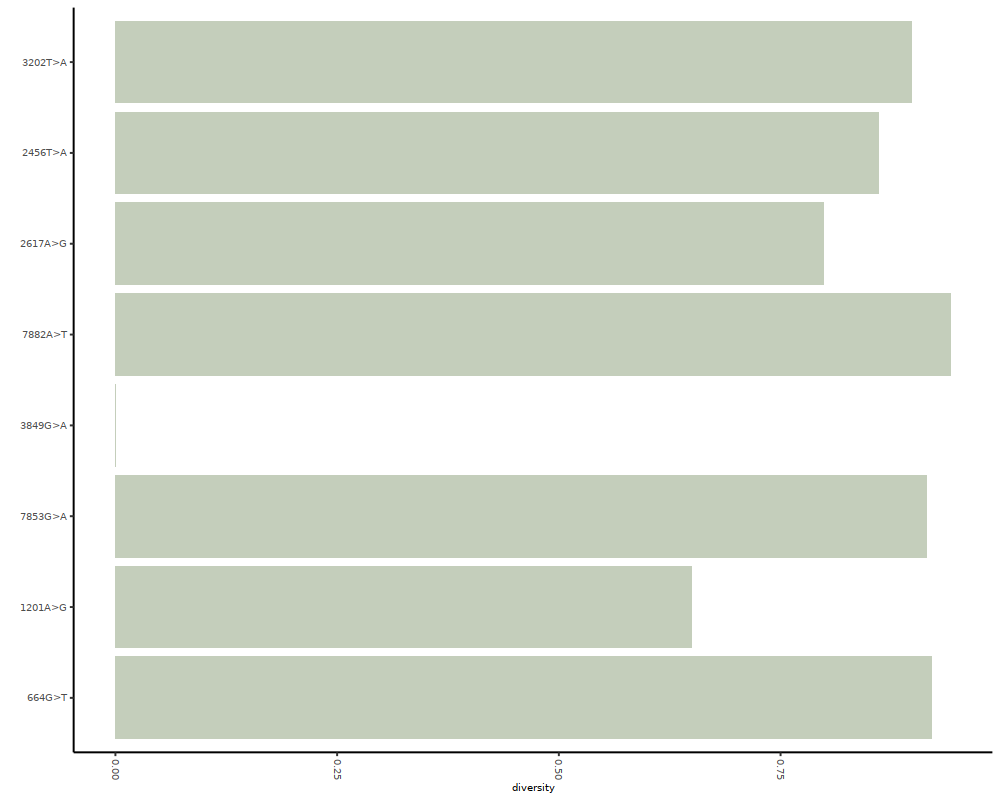

In [204]:
plot_df = data.frame(variant=CIV, diversity = shannon_e)
plot_df$variant = factor(plot_df$variant, levels = rev(CIV) )
diversity_plot = ggplot(plot_df, aes(x=variant, y=diversity)) + geom_bar(stat="identity", fill = "#899d78", alpha=0.5) + theme_classic() +
        theme(plot.title=element_text(hjust=0.5), axis.text = element_text(size = 7), axis.title = element_text(size=7),
        axis.text.x = element_text(angle = 270, hjust = 0.1, vjust = 0.5)) + xlab("") + coord_flip()
diversity_plot
ggsave(plot = diversity_plot, file = paste0(civ_dir, "/diversity_plot.pdf"), height = 3, width = 3)

In [104]:
saveRDS(file = "/syn1/wangxin/work/SS2/Li/plots/col_pal_fig2_SS2_TCR_20240301.rds", col_pal)

In [120]:
col_pal = readRDS("/syn1/wangxin/work/SS2/Li/plots/col_pal_fig2_SS2_TCR_20240301.rds")

[1] "#f8961e" "#c0d6df" "#9a031e" "#0f4c5c" "#e36414" "#dda15e" "#fefae0"
 [8] "#283618" "#7cb518" "#e9c46a" "#90be6d" "#e76f51" "#e4c1f9" "#f9c74f"
[15] "#a9def9" "#3d348b" "#33a1fd" "#2a9d8f" "#43aa8b" "#577590" "#f3722c"
[22] "#264653" "#778da9" "#d0f4de" "#277da1" "#f94144" "#ffdac6" "#7678ed"
[29] "#606c38" "#415a77" "#1b263b" "#bc6c25" "#5f0f40" "#4d908e" "#e0e1dd"
[36] "#f9844a"

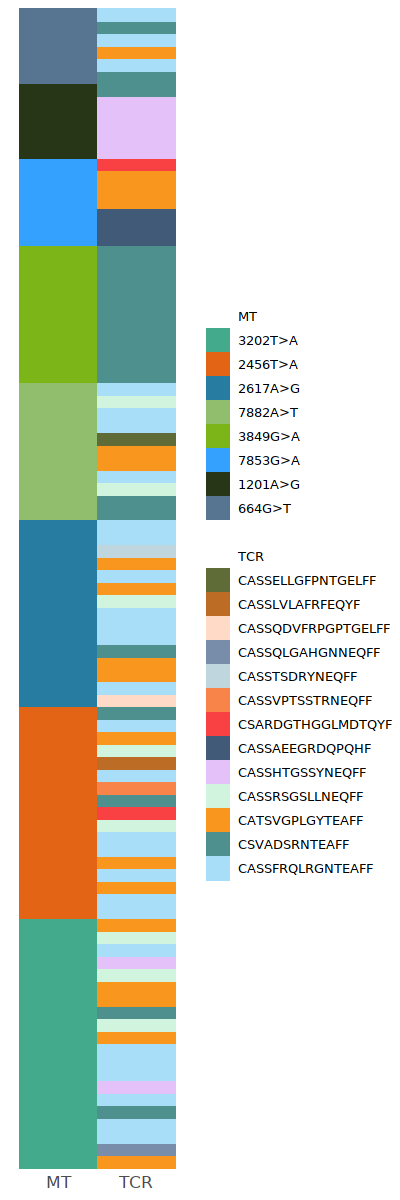

In [206]:
options(repr.plot.width = 4, repr.plot.height = 12, repr.plot.res = 100)
col_pal = sample(col_pal)


TCR_df = data.frame("TCR" = tcr_meta[colnames(new_plot_mat), "CDR3b"], row.names = colnames(new_plot_mat))
TCR_seq = unique(TCR_df$TCR)


bar_plot_df = cbind(clone_info_df, TCR_df)
TCR_freq_df = as.data.frame(table(bar_plot_df$TCR))
TCR_order = as.character(TCR_freq_df[order(TCR_freq_df$Freq),"Var1"])
mt_order = unique(bar_plot_df$Clone)


df_log = pivot_longer(bar_plot_df, cols = c("Clone", "TCR"), names_to = "Variable", values_to = "Value")
df_log$Cell = factor(df_log$Cell, levels = colnames(new_plot_mat))
legend_order = c("MT", mt_order, " ","TCR", TCR_order)
df_log$Value = factor(df_log$Value, levels = legend_order)


# Create a color palette
pal1 <- c("white", col_pal[1:length(mt_order)], "white", "white", col_pal[(length(mt_order)+1):(length(mt_order)+length(TCR_order))])
names(pal1) = legend_order

if (length(mt_order)+length(TCR_order) > length(col_pal)) {
    extra_col_num = length(mt_order) + length(TCR_order) - length(col_pal)
    pal1[legend_order[(length(col_pal)+1+3): (length(col_pal) + extra_col_num+3)]] = sample(col_pal[1:length(mt_order)], extra_col_num)
    }


# Plot the stacked bar plot with "CLL" on the y-axis
p = ggplot(df_log, aes(x = Variable, y = Cell, fill = Value)) +
  geom_tile() +
  scale_fill_manual(name = NULL,values = pal1, drop=FALSE) +   guides(fill=guide_legend(ncol=1)) +
   theme(legend.position="right", 
         legend.key = element_rect(fill=NA),
         legend.title=element_blank()) + theme_classic() +
          theme(axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_text(size = 12, face = "italic"), axis.line = element_blank()) + 
            scale_x_discrete(breaks=c("Clone","TCR"), labels=c("MT", "TCR"))
p
ggsave(paste0(civ_dir, "/", sample_name, "_MT_to_TCR_correlation.pdf"), p, height = 4, width = 4)

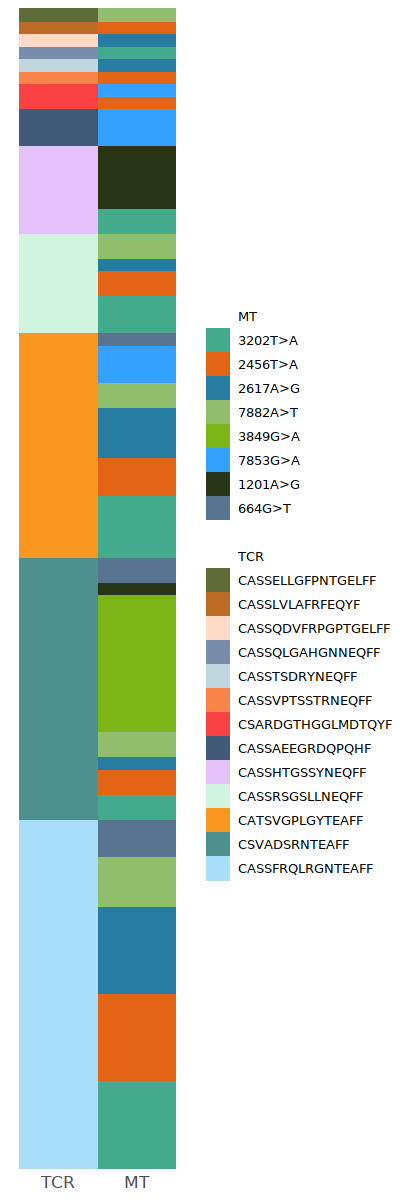

In [207]:
options(repr.plot.width = 4, repr.plot.height = 12, repr.plot.res = 100)
cell_order_by_TCR = bar_plot_df$Cell[order(match(bar_plot_df$TCR, rev(TCR_order)))]
df_log2 = pivot_longer(bar_plot_df, cols = c("Clone", "TCR"), names_to = "Variable", values_to = "Value")
df_log2 = df_log2[order(match(df_log2$Cell, cell_order_by_TCR)),]
df_log2$Cell = factor(df_log2$Cell, levels = cell_order_by_TCR)

legend_order = c("MT", mt_order, " ","TCR", TCR_order)
df_log2$Value = factor(df_log2$Value, levels = legend_order)

df_log2$Variable = factor(df_log2$Variable, levels = c("TCR", "Clone"))

p0 = ggplot(df_log2, aes(x = Variable, y = Cell, fill = Value)) +
  geom_tile() +
  scale_fill_manual(name = NULL,values = pal1, drop=FALSE) + guides(fill=guide_legend(ncol=1)) +
   theme(legend.position="right", 
         legend.key = element_rect(fill=NA),
         legend.title=element_blank()) + theme_classic() +
          theme(axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_text(size = 12, face = "bold"), axis.line = element_blank()) + 
            scale_x_discrete(breaks=c("TCR","Clone"), labels=c("TCR", "MT"))
p0
ggsave(paste0(civ_dir, "/", sample_name, "_TCR_to_MT_correlation.pdf"), p, height = 4, width = 4)

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

CIV heatmaps have been saved to: /syn1/wangxin/work/SS2/Li/samples/SLE232/CIV/SLE232_CIV_heatmap.pdf



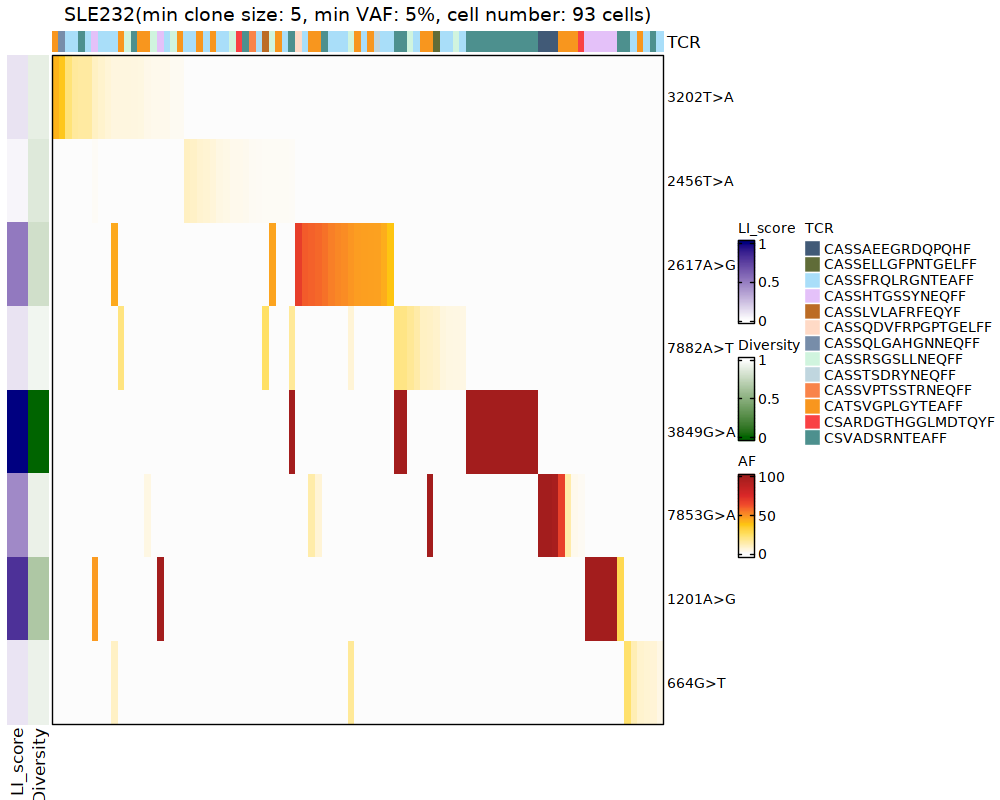

In [221]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 100)
col_pal1 = colorRamp2(c(0, 1), c( "white", "navyblue"))
col_pal2 = colorRamp2(c(0, 1), c( "darkgreen", "white"))
row_annot <- rowAnnotation(
  df = data.frame(LI_score = sub_mv1_ls, Diversity = shannon_e),
  col = list(LI_score = col_pal1, Diversity = col_pal2), annotation_legend_param = list(border = "#000000"))

ct_plot_df = as.data.frame(tibble(TCR=meta[colnames(new_plot_mat),"CDR3b"]))
ann_col = list("TCR"=pal1[TCR_seq])
names(ann_col$TCR) = TCR_seq
ha <- HeatmapAnnotation(df = ct_plot_df, col = ann_col)
clone_size_cutoff = conditions_subset.tib$min_clone_size[a]
vaf_cutoff = substr(conditions_subset.tib$min_vaf[a],2,nchar(conditions_subset.tib$min_vaf[a]))

my_title = paste0(sample_name,"(min clone size: ",clone_size_cutoff,", min VAF: ",vaf_cutoff, "%, cell number: ", ncol(new_plot_mat)," cells)")
htmap_p = Heatmap(new_plot_mat, column_title = my_title, 
               col = colorRamp2(seq(0, 100, length.out = 9),
                                c("#FCFCFC","#FFEDB0","#FFDF5F","#FEC510","#FA8E24","#F14C2B","#DA2828","#BE2222","#A31D1D")),
               show_row_names = T,
               show_column_names = F,
               cluster_columns = F,
               cluster_rows = F,
               row_names_gp = gpar(fontsize = 10),
               name = "AF",
               heatmap_legend_param = list(border = "#000000", grid_height = unit(5, "mm")),
               top_annotation = ha,
                  left_annotation = row_annot,
               border = T,
               #width = unit(100, "mm"),
               #height = unit(100, "mm"),
               use_raster = T,
               raster_quality = 5)
htmap_p

heatmap_name = paste0(civ_dir, "/", sample_name,"_CIV_heatmap.pdf")
pdf(heatmap_name, height = 2.645, width = 6.5)
htmap_p
dev.off()
message(paste0("CIV heatmaps have been saved to: ", heatmap_name))


In [214]:
umap_meta = read.csv("/syn1/wangxin/work/SS2/Li/new_tcr_meta.csv", head=T, row.names = 1, check.names = F)
meta_sub = umap_meta[umap_meta$`patient ID` == sample_name,]
new_meta = meta_sub[,c("UMAP_1", "UMAP_2", "CDR3b")]

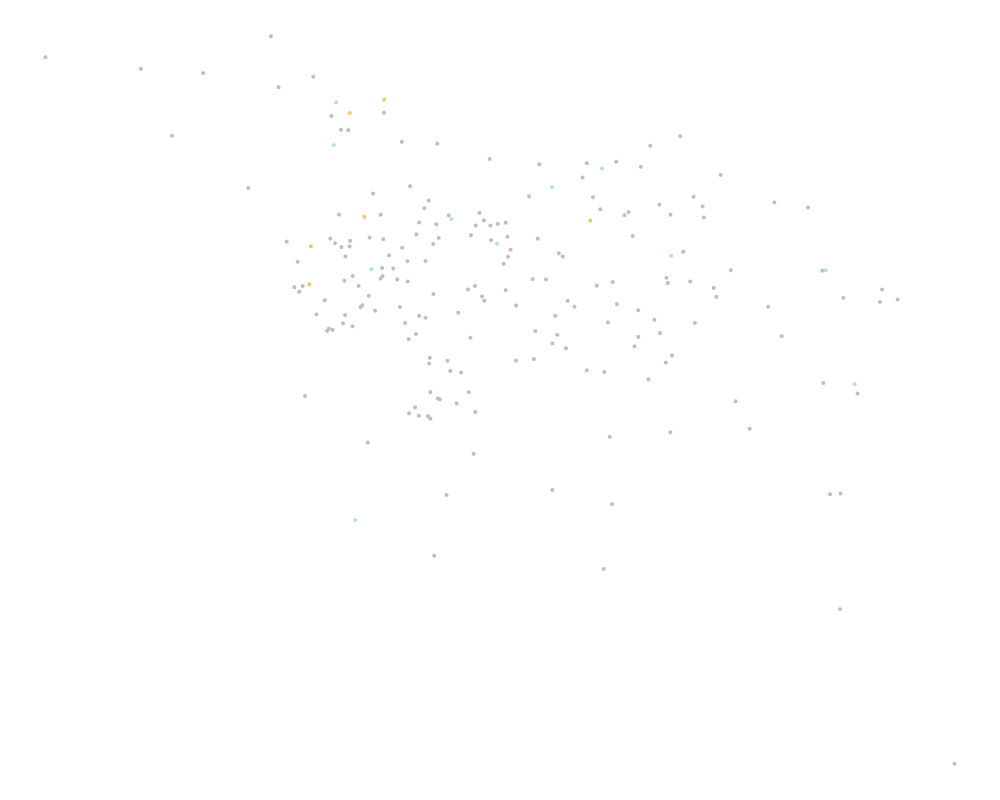

In [215]:
new_meta$MT = "Other"
pos_3849 = clone_info_df$Cell[clone_info_df$Clone == "3849G>A"]
pos_1201 = clone_info_df$Cell[clone_info_df$Clone == "1201A>G"]
new_meta[pos_3849, "MT"] = "3849G>A"
new_meta[pos_1201, "MT"] = "1201A>G"
new_meta = new_meta[rev(order(new_meta$MT)),]
new_meta$MT = factor(new_meta$MT, levels = c("3849G>A", "1201A>G", "Other"))
p2 = ggplot(new_meta, aes(x= UMAP_1, y=UMAP_2, color = MT)) + geom_point(size=1, stroke = 0 ) + theme_void() + scale_color_manual(values = c("#b0ddf8", "#f3c856", "gray")) + theme(legend.position = "none")
p2
ggsave(paste0(civ_dir, "/SLE232_MT_UMAP.pdf"), p2, height = 2, width = 2)

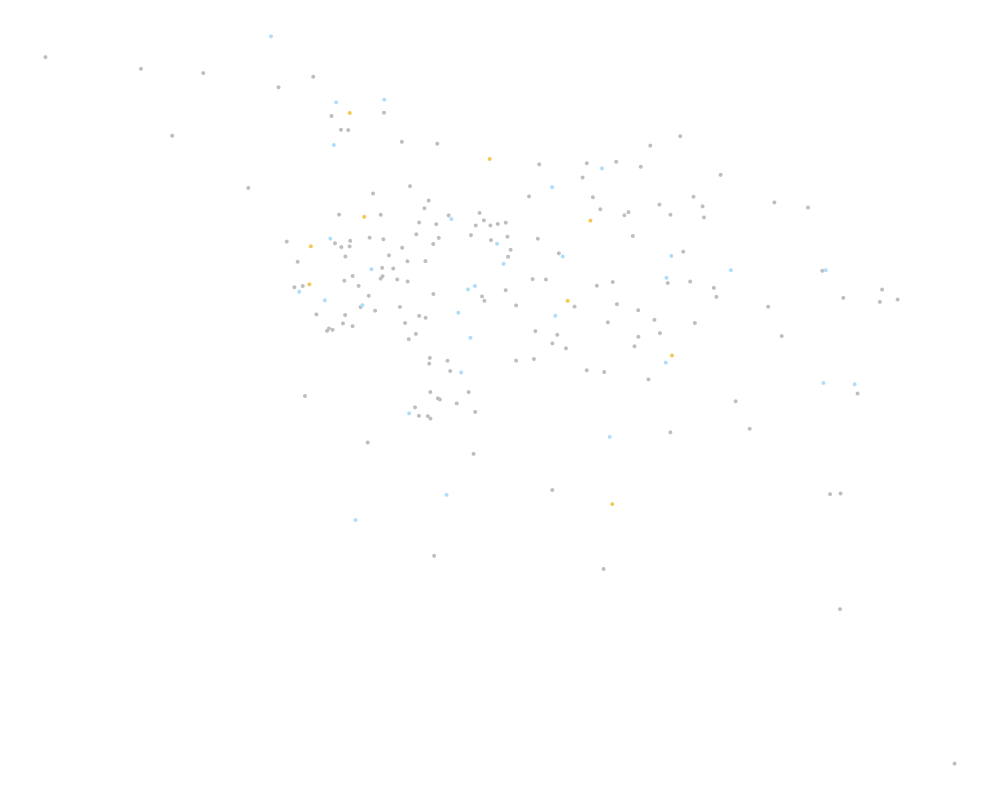

In [217]:
new_meta$TCR = "Other"
new_meta[new_meta$CDR3b == "CSVADSRNTEAFF", "TCR"] = "CSVADSRNTEAFF"
new_meta[new_meta$CDR3b == "CASSHTGSSYNEQFF", "TCR"] = "CASSHTGSSYNEQFF"
new_meta = new_meta[rev(order(new_meta$TCR)),]
new_meta$TCR = factor(new_meta$TCR, levels = c("CSVADSRNTEAFF", "CASSHTGSSYNEQFF", "Other"))
p4 = ggplot(new_meta, aes(x= UMAP_1, y=UMAP_2, color = TCR)) + geom_point(size=1, stroke = 0 ) + theme_void() + scale_color_manual(values = c("#b0ddf8", "#f3c856", "gray")) + theme(legend.position = "none")
p4
ggsave(paste0(civ_dir, "/SLE232_TCR_UMAP.pdf"), p4, height = 2, width = 2)

In [218]:
new_meta$C1= "No"
new_meta$C2 = "No"
pos_3849 = clone_info_df$Cell[clone_info_df$Clone == "3849G>A"]
pos_1201 = clone_info_df$Cell[clone_info_df$Clone == "1201A>G"]
new_meta[pos_3849,"C1"] = "Yes"
new_meta[pos_1201,"C2"] = "Yes"
#new_meta[MT_neg,"MT"] = "3202T>A"

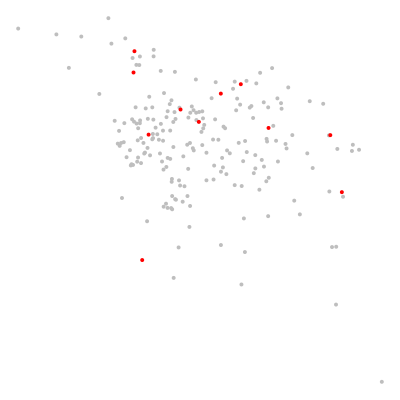

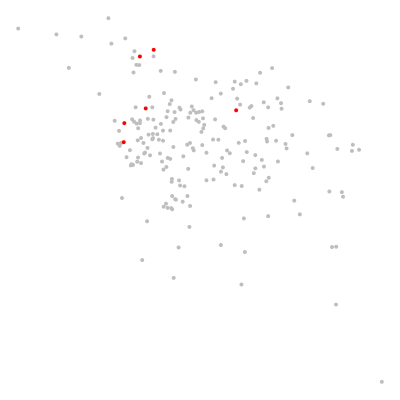

In [219]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)
new_meta$C1 = factor(new_meta$C1, levels = c("Yes", "No"))
new_meta = new_meta[rev(order(new_meta$C1)),]
p2 = ggplot(new_meta, aes(x= UMAP_1, y=UMAP_2, color = C1)) + geom_point(size=1, stroke = 0 ) + theme_void() + scale_color_manual(values = c("red", "gray")) + theme(legend.position = "none")
p2

new_meta$C2 = factor(new_meta$C2, levels = c("Yes", "No"))
new_meta = new_meta[rev(order(new_meta$C2)),]
p3 = ggplot(new_meta, aes(x= UMAP_1, y=UMAP_2, color = C2)) + geom_point(size=1, stroke = 0 ) + theme_void() + scale_color_manual(values = c("red", "gray")) + theme(legend.position = "none")
p3


In [220]:
ggsave(paste0(civ_dir, "/SLE232_MT_UMAP_3849GA.pdf"), p2, height = 2, width = 2)
ggsave(paste0(civ_dir, "/SLE232_MT_UMAP_1201AG.pdf"), p3, height = 2, width = 2)